# Loan Repayment Assessment in Banking
### Problem Statement:
Welcome to KnowledgeHut AI hackathon – Loan Repayment Assessment in Banking. You are required
to build and train a model that identifies a customer will repay or default from the loan dataset. This
dataset is included in loan data, and provides a challenging classifier that will test what you have learnt
in this course.
Task:
Your task is to build this model based on the details in this document and submit it. Please read the
details carefully before attempting this hackathon.
You will need to decide the following:
1. Use the specific source or dataset for assess loan repayment shared with you
2. What is your intended data split ratio for training, validation, and test sets for the loan dataset? How
do you plan to ensure randomness in this split?
3. Do you plan to explore the importance of these components further?
4. Do you anticipate class imbalance in the 'loan_status' feature, where
Paid: Applicant has fully paid the loan (the principal and the interest rate)
Defaulted: Applicant has not paid the installments in due time for a long period of time, i.e. Client
has defaulted on the loan
If so, how will you address this imbalance?
5. Will you normalize the features? If yes, what normalization techniques do you have in mind?
6. Do you intend to perform data preprocessing tasks such as outlier detection, missing value handling,
or feature selection before training your model.


* ✓Statistics descriptive analysis
* ✓EDA
* ✓Data preprocessing
* ✓Feature scaling
* ✓Feature engineering
* ✓Feature selection
* ✓Build model
* ✓Ensemble techniques - Bagging, Boosting
* ✓Cross validation
* ✓Grid search, Tuning Hyper parameters
*

```
# This is formatted as code
```

✓Evaluation metric: F1 - Score

## Data Description of Features

### Column Descriptions

- **earliest_cr_line**: The month the borrower's earliest reported credit line was opened.
- **emp_title**: The job title supplied by the Borrower when applying for the loan.
- **fico_range_high**: The upper boundary range the borrower’s FICO at loan origination belongs to.
- **fico_range_low**: The lower boundary range the borrower’s FICO at loan origination belongs to.
- **Grade**: LC assigned loan grade.
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers.
- **initial_list_status**: The initial listing status of the loan. Possible values are – W, F.
- **num_actv_bc_tl**: Number of currently active bankcard accounts.
- **mort_acc**: Number of mortgage accounts.
- **tot_cur_bal**: Total current balance of all accounts.
- **open_acc**: The number of open credit lines in the borrower's credit file.
- **pub_rec**: Number of derogatory public records.
- **pub_rec_bankruptcies**: Number of public record bankruptcies.
- **Purpose**: A category provided by the borrower for the loan request.
- **revol_bal**: Total credit revolving balance.
- **Title**: The loan title provided by the borrower.
- **total_acc**: The total number of credit lines currently in the borrower's credit file.
- **verification_status**: Indicates if income was verified by LC, not verified, or if the income source was verified.
- **addr_state**: The state provided by the borrower in the loan application.
- **annual_inc**: The self-reported annual income provided by the borrower during registration.
- **emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership**: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- **int_rate**: Interest Rate on the loan.
- **loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- **sub_grade**: LC assigned loan subgrade.
- **Term**: The number of payments on the loan. Values are in months and can be either 36 or 60.
- **revol_util**: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

### Target

- **loan_status**: Status of the loan.

### Test Data

- **test_loan_data.csv**: This dataset can be used to test model.


# import the import libraries for machine learning model trainning

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df = pd.read_csv('train_loan_data (1).csv')
df.head()

addr_state  annual_inc earliest_cr_line emp_length  \
0         CO     85000.0           Jul-97  10+ years   
1         CA     40000.0           Apr-87  10+ years   
2         FL     60000.0           Aug-07  10+ years   
3         IL    100742.0           Sep-80  10+ years   
4         MD     80000.0           Jul-99  10+ years   

                        emp_title  fico_range_high  fico_range_low grade  \
0                          Deputy              744             740     E   
1  Department of Veterans Affairs              724             720     B   
2                Marble polishing              679             675     B   
3                         printer              664             660     B   
4                   Southern Mgmt              669             665     F   

  home_ownership application_type  ... pub_rec_bankruptcies  \
0       MORTGAGE       Individual  ...                  0.0   
1           RENT       Individual  ...                  0.0   
2       MORTGAGE       Individual  ...                  0.0   
3       MORTGAGE       Individual  ...                  0.0   
4           RENT       Individual  ...                  0.0   

              purpose  revol_bal  revol_util  sub_grade        term  \
0  debt_consolidation       5338        93.6         E1   60 months   
1  debt_consolidation      19944        60.3         B1   36 months   
2  debt_consolidation      23199        88.5         B5   36 months   
3  debt_consolidation      18425        69.0         B2   36 months   
4  debt_consolidation      34370        90.0         F5   60 months   

                 title  total_acc  verification_status loan_status  
0   Debt consolidation          8      Source Verified   Defaulted  
1          Credit Loan         12             Verified        Paid  
2   Debt consolidation         16      Source Verified        Paid  
3   Debt consolidation         19      Source Verified        Paid  
4  Debt Connsolidation         59             Verified        Paid  

[5 rows x 28 columns]

# Statistics descriptive analysis


In [50]:
df.shape

(80000, 28)

here we find the shape of the trainig data this data set have total number of rows is equale to 80000 and number of columns 28

In [51]:
# know here we using the describe function to find the statistical summary of the entire numerical data from the total data
df.describe().T

count           mean            std     min       25%  \
annual_inc            80000.0   76046.143138   69020.055377    0.00  46000.00   
fico_range_high       80000.0     699.987975      31.734840  664.00    674.00   
fico_range_low        80000.0     695.987813      31.734075  660.00    670.00   
int_rate              80000.0      13.232898       4.771705    5.31      9.75   
loan_amnt             80000.0   14403.867813    8703.826298  750.00   7925.00   
num_actv_bc_tl        76052.0       3.633790       2.262505    0.00      2.00   
mort_acc              77229.0       1.674759       2.005104    0.00      0.00   
tot_cur_bal           76052.0  141586.358991  159371.366632    0.00  29642.00   
open_acc              80000.0      11.605675       5.483362    1.00      8.00   
pub_rec               80000.0       0.216675       0.579854    0.00      0.00   
pub_rec_bankruptcies  79969.0       0.137103       0.383202    0.00      0.00   
revol_bal             80000.0   16289.340975   22649.147472    0.00   5965.75   
revol_util            79947.0      51.899142      24.504836    0.00     33.50   
total_acc             80000.0      25.036875      12.009194    2.00     16.00   

                           50%        75%         max  
annual_inc            65000.00   90000.00  7141778.00  
fico_range_high         694.00     714.00      850.00  
fico_range_low          690.00     710.00      845.00  
int_rate                 12.74      15.99       30.99  
loan_amnt             12000.00   20000.00    40000.00  
num_actv_bc_tl            3.00       5.00       32.00  
mort_acc                  1.00       3.00       32.00  
tot_cur_bal           81000.50  211027.25  5172185.00  
open_acc                 11.00      14.00       80.00  
pub_rec                   0.00       0.00       24.00  
pub_rec_bankruptcies      0.00       0.00        7.00  
revol_bal             11111.00   19635.00  1023940.00  
revol_util               52.20      70.80      152.60  
total_acc                23.00      32.00      162.00

In [52]:
# here we usinhg the shape function for getting the more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

in this data set we can easily see the number of values is missing into the given data set missing values three columns have objects data type ,and  five columns have float dta types so the total number of columns which have missing values is eight columns

In [53]:
df['loan_status'].value_counts()

loan_status
Paid         64030
Defaulted    15970
Name: count, dtype: int64

### convert the loan status into the 0 and 1

## EDA (Exploratory Data Analysis)

EDA is primarily about understanding the dataset. It involves:

### Understanding the Data Structure
- Getting to know the types of data, such as numerical, categorical, and the distribution of data.

### Identifying Patterns and Relationships
- Using visualizations and statistical methods to uncover patterns, trends, and relationships between variables.

### Detecting  Outliers
- Finding unusual data points that might need special attention.


### *Understanding the Data Structure*


## finding the null values into the dataset

In [54]:
# know here we check the total number of missing values into the dataset into the percentage
df.isnull().sum()/df.shape[0]*100

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

We can easily see the percentage of missing values ​​in the total values.

## Here we further differentiate between numerical values ​​and categorical values


In [55]:
# Here we further differentiate between numerical values ​​and categorical values## calc#ulation
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

here into the plot we can easily see the most off the numerical features affacted by the outlire so we use the meadian not mean

### cheching the duplicate values into the dataset

In [56]:
# here check the duplicated values
df.duplicated().sum()

0

This dataset did not have any duplicate values

## Identifying Patterns and Relationships


# Using the sweetviz
Here we import sweetviz to analysis the the data

In [13]:
! pip install sweetviz



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)


                                             |          | [  0%]   00:00 -> (? left)


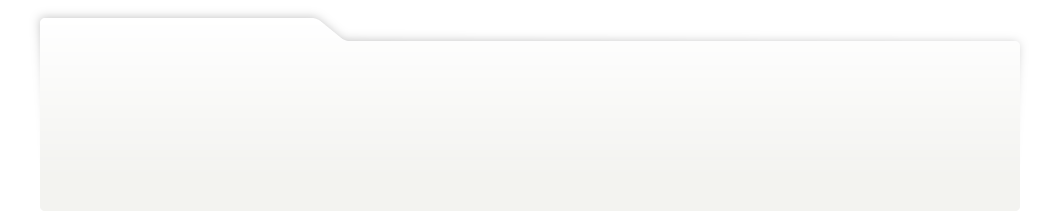
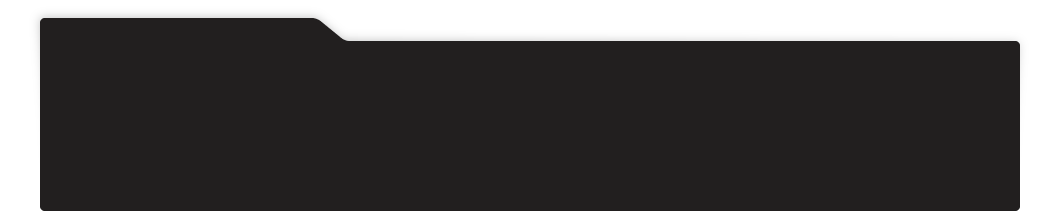
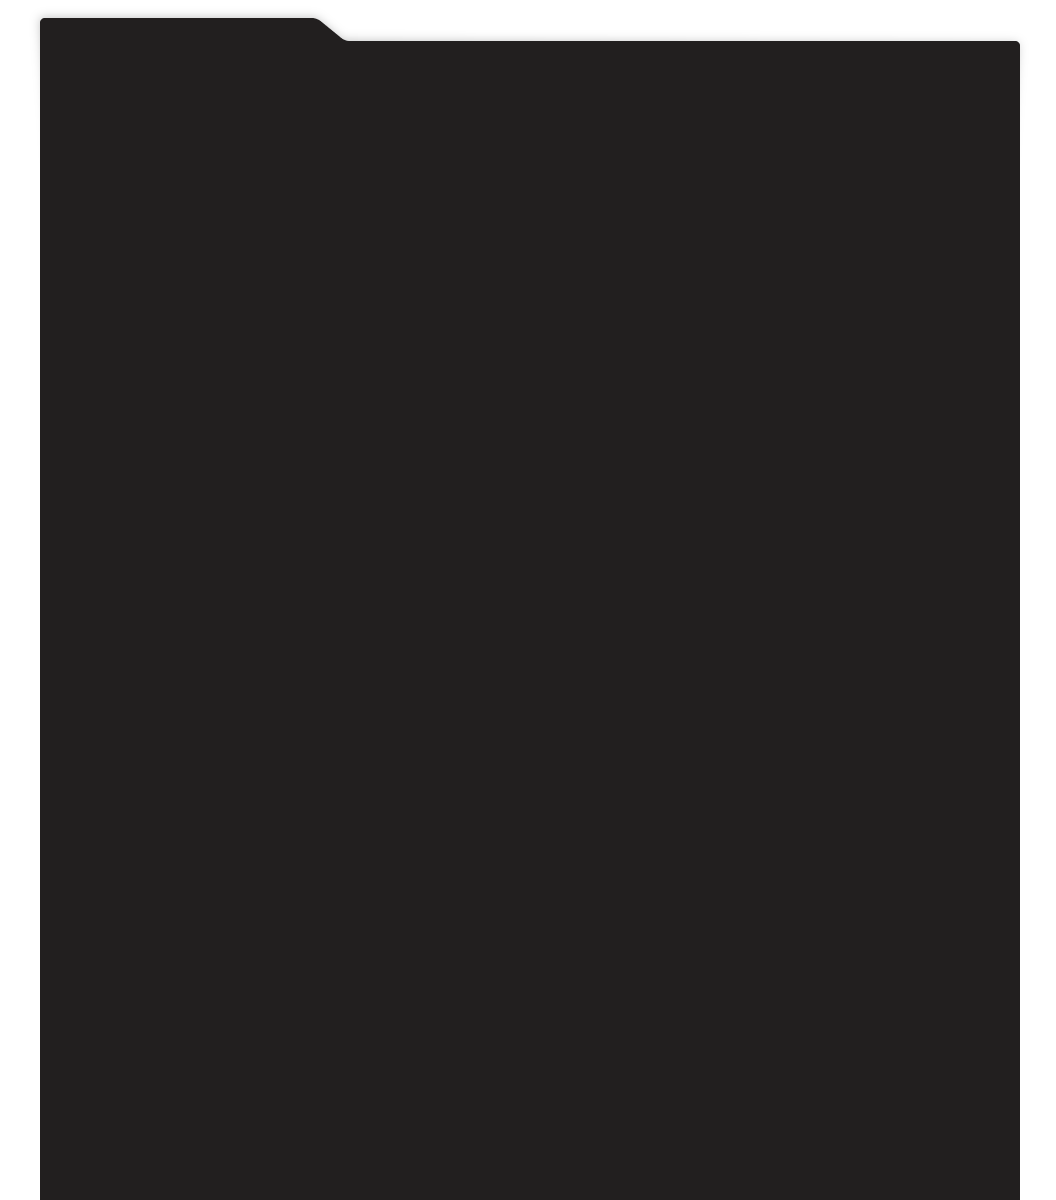
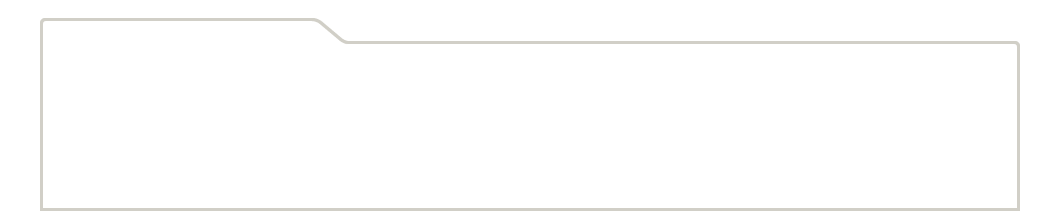
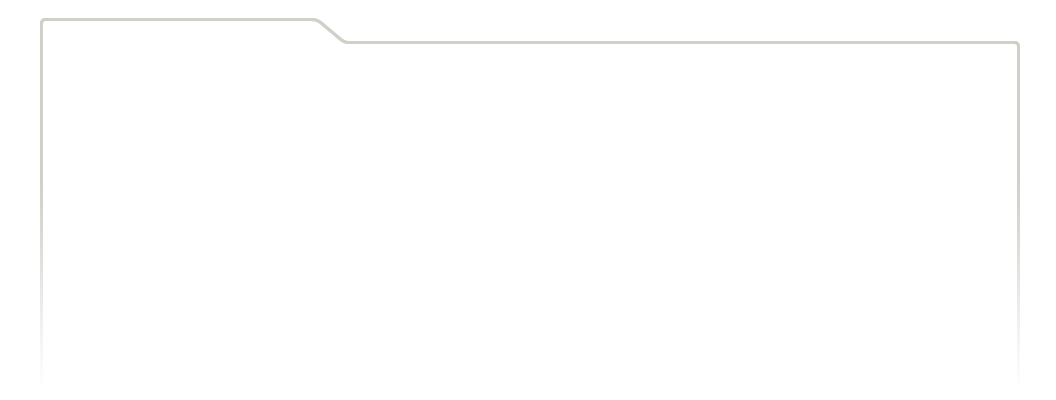
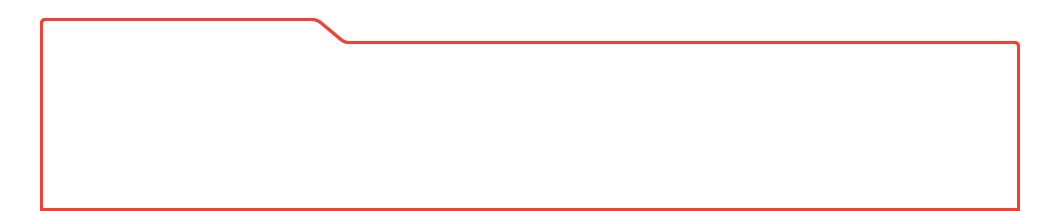
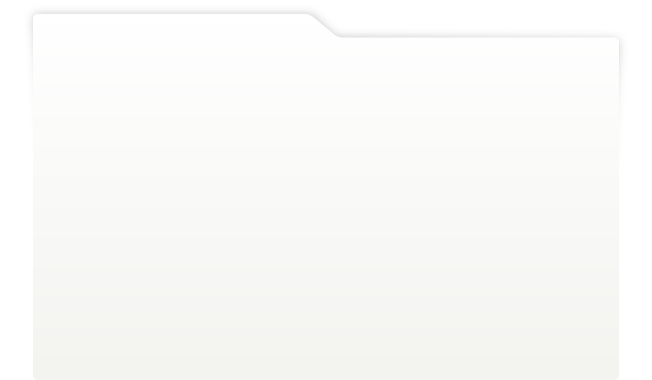
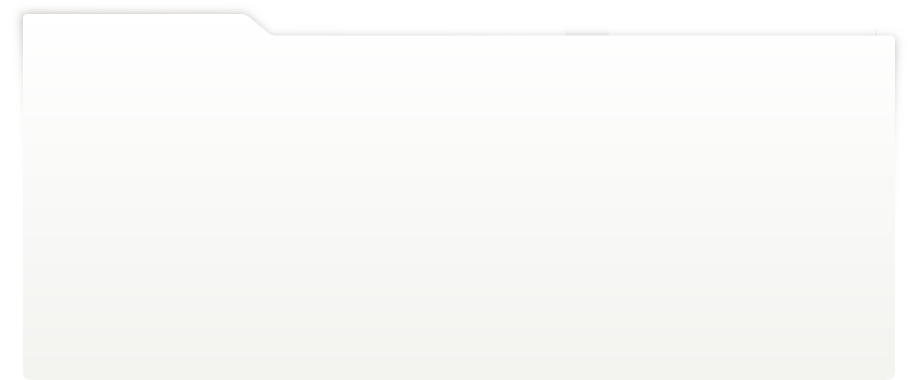
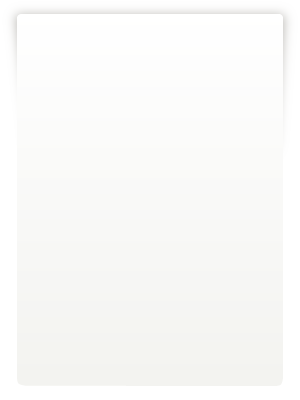
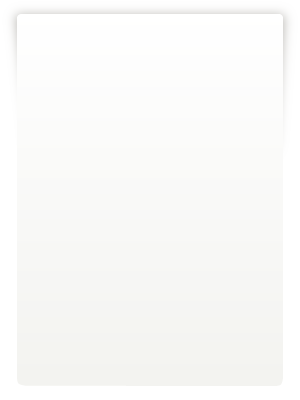
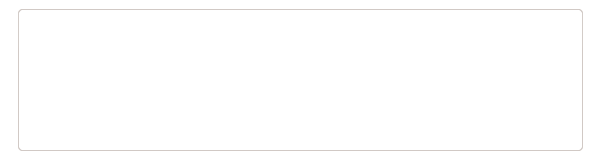
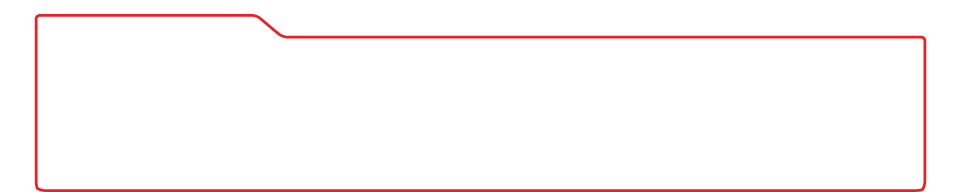
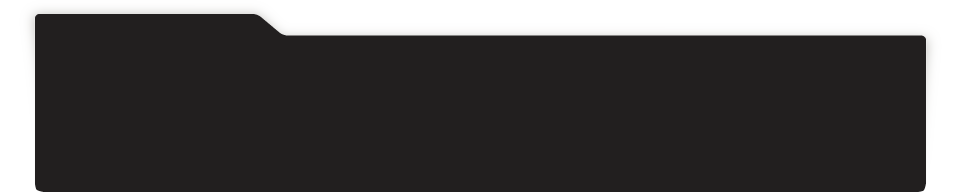
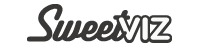
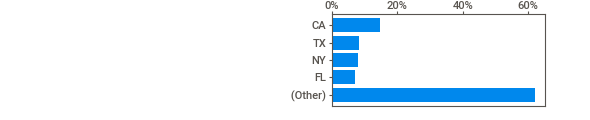
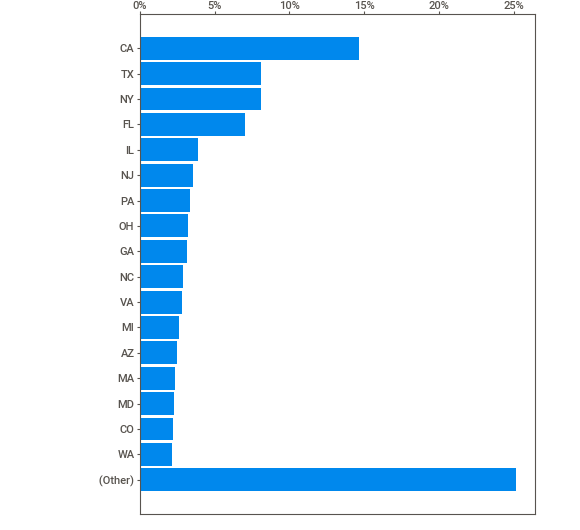
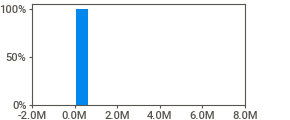
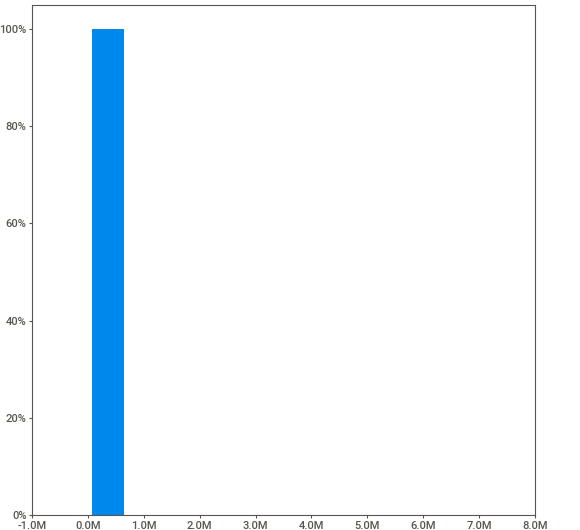
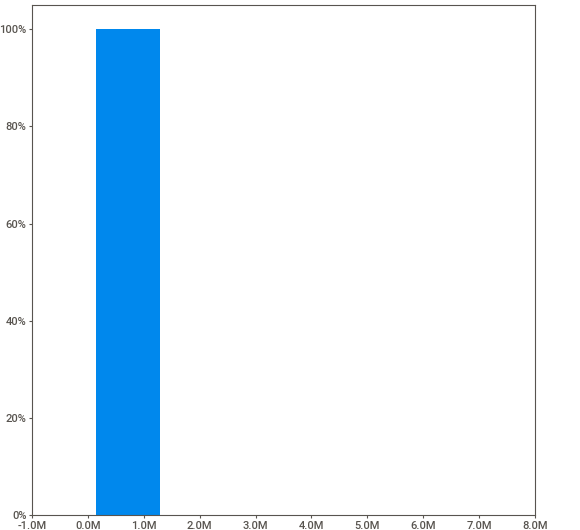
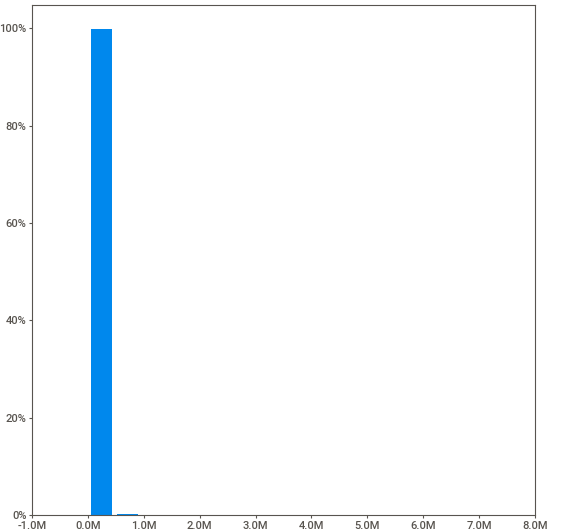
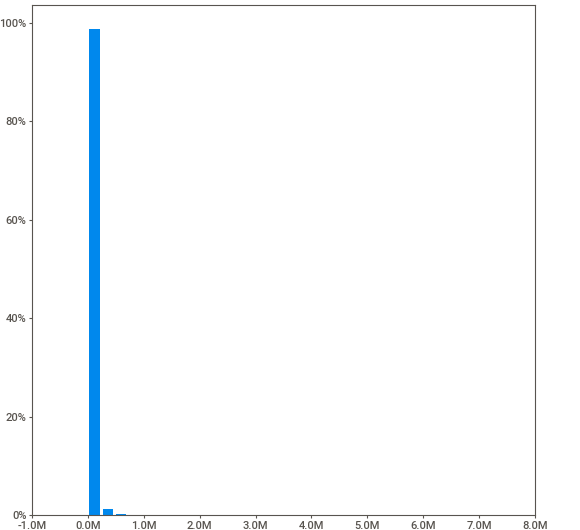
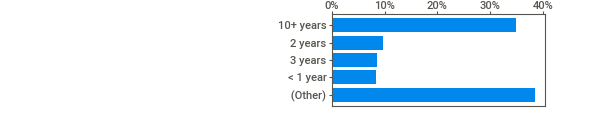
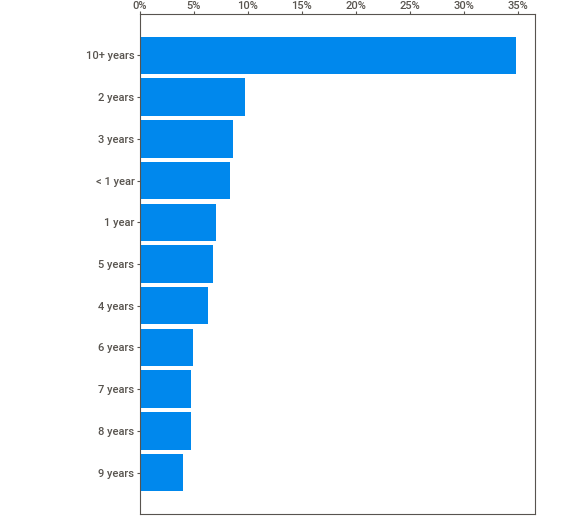
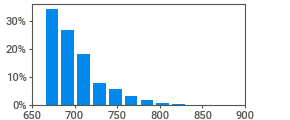
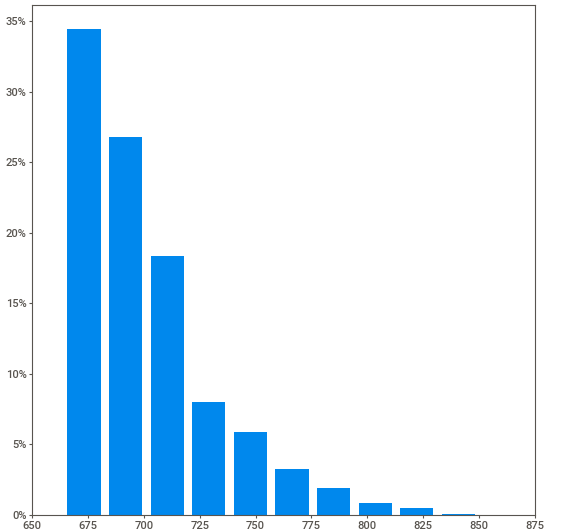
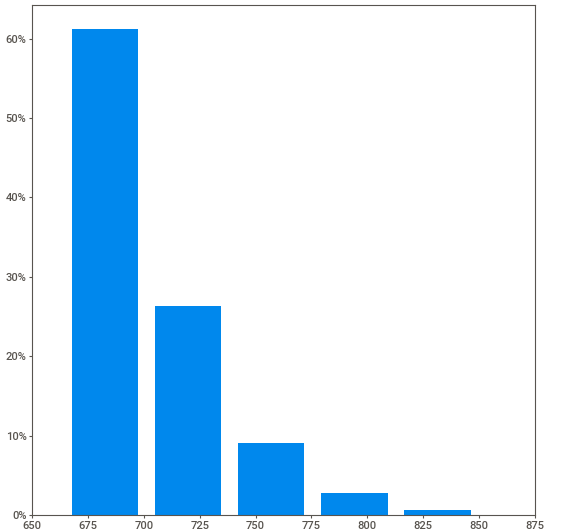
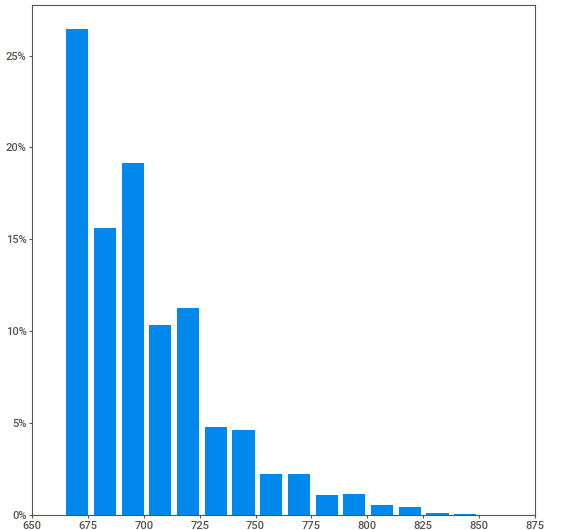
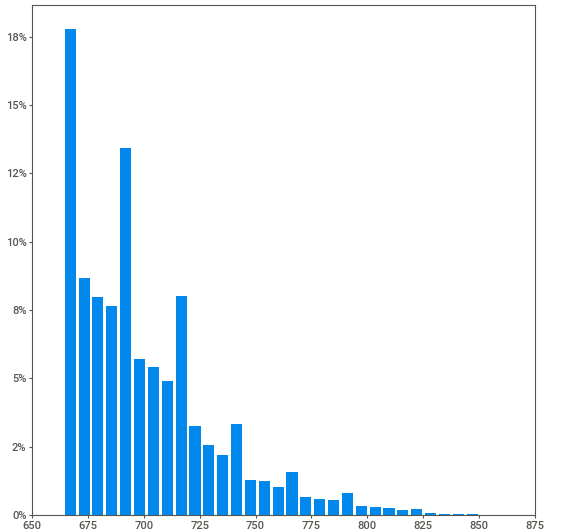
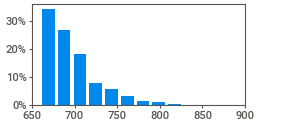
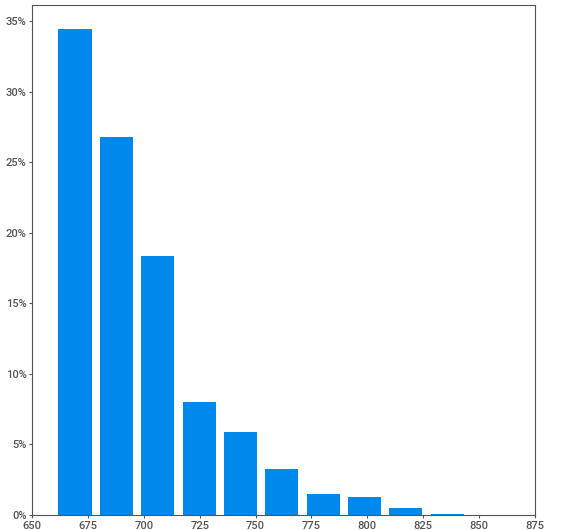
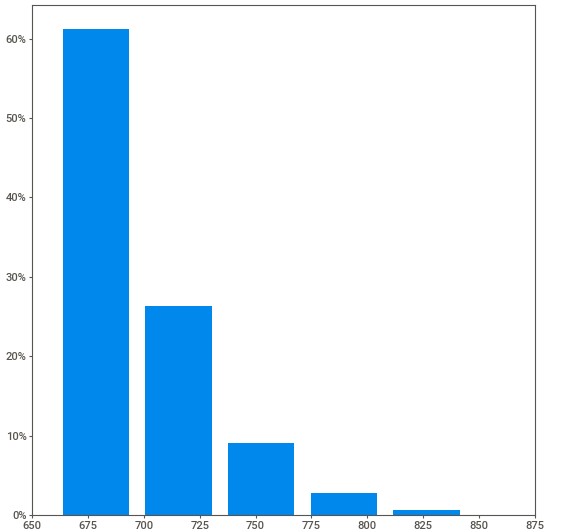
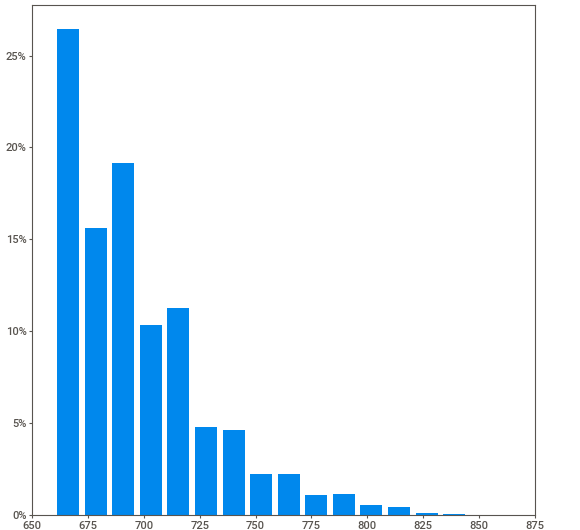
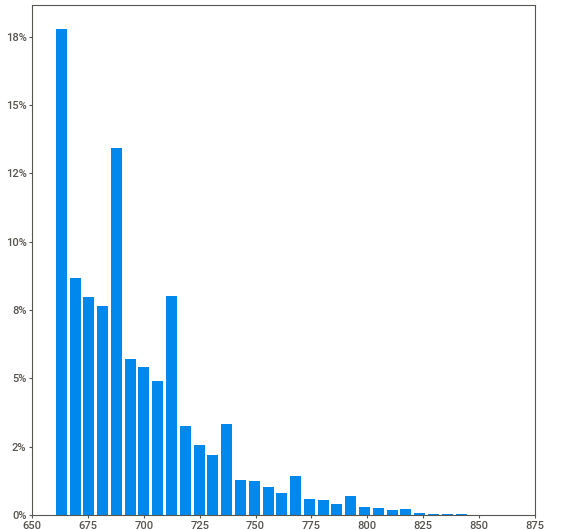
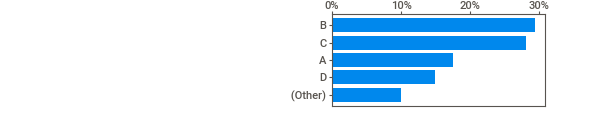
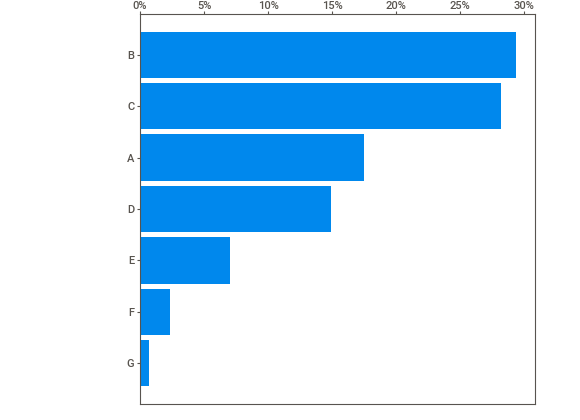
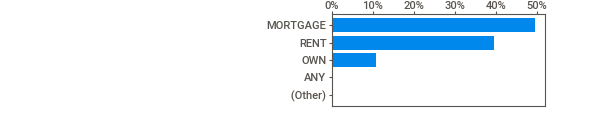
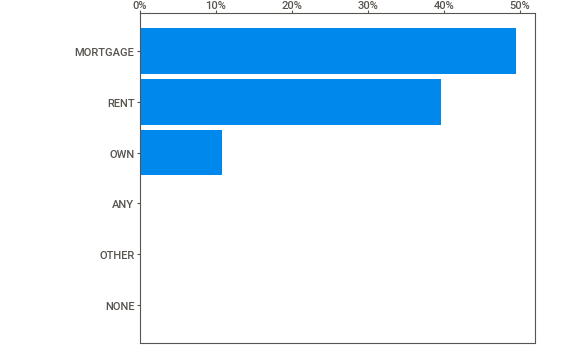
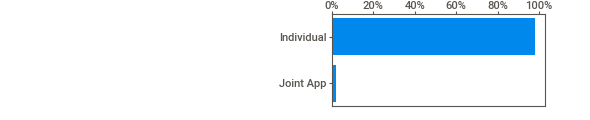
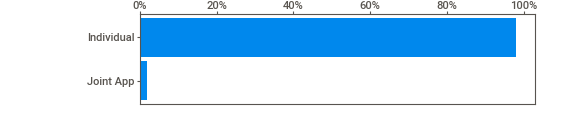
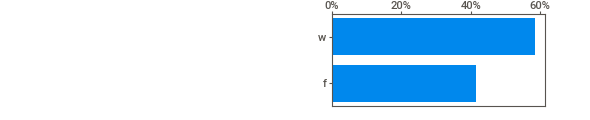
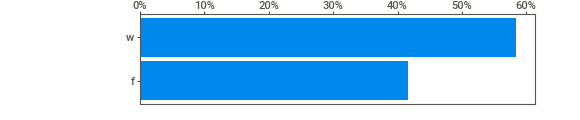
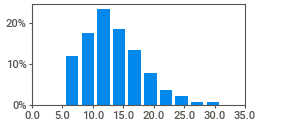
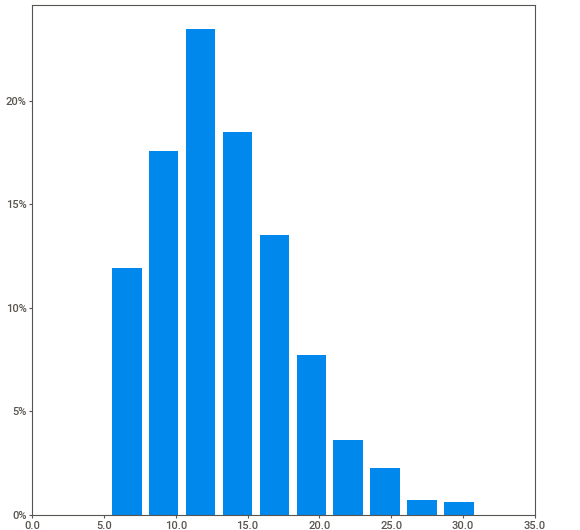
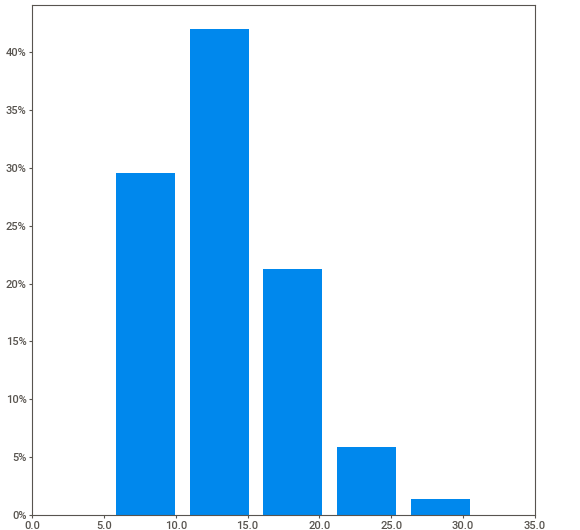
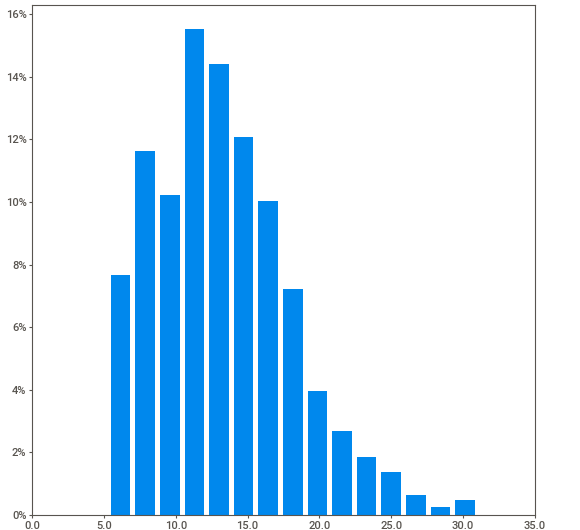
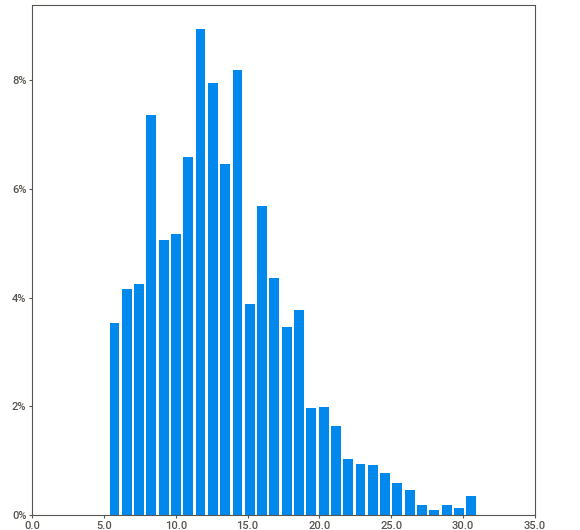
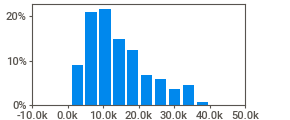
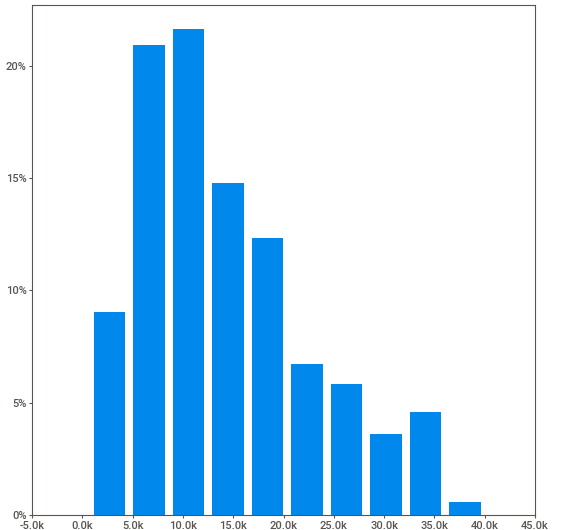
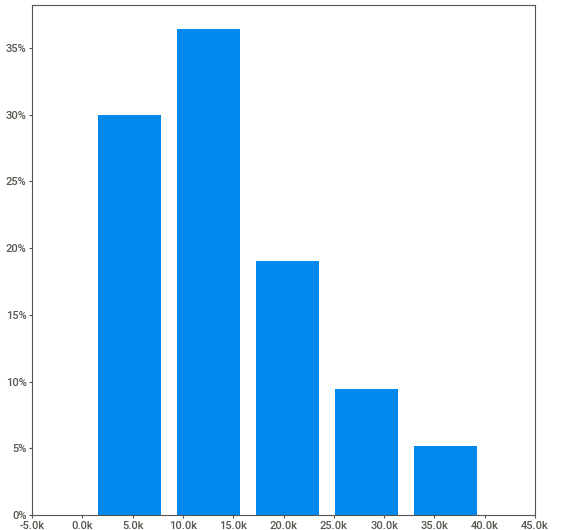
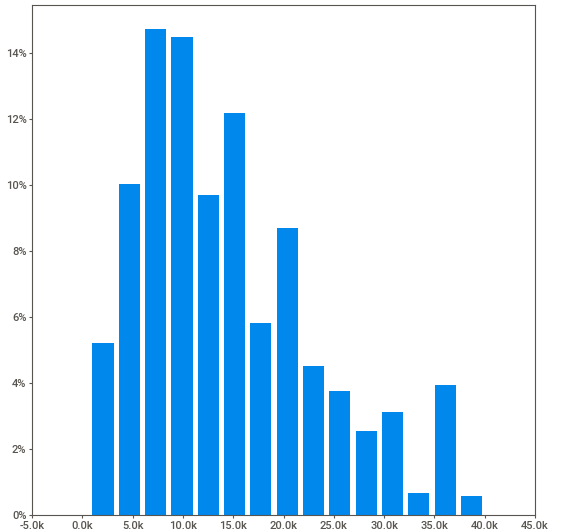
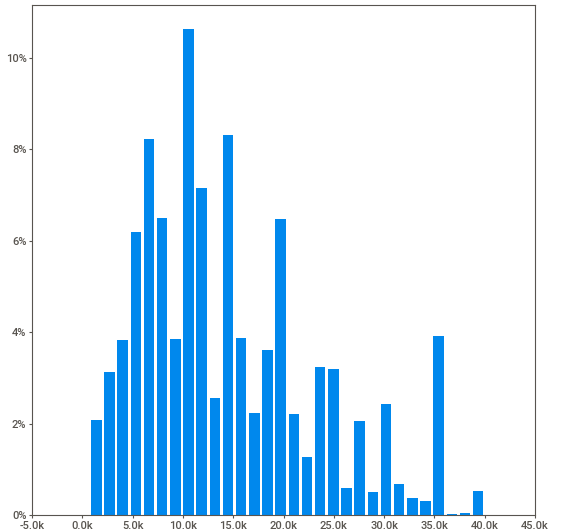
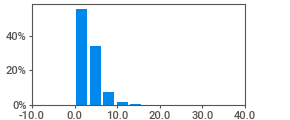
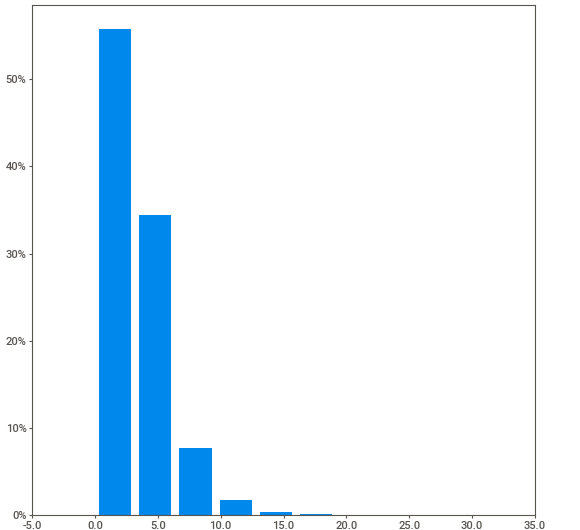
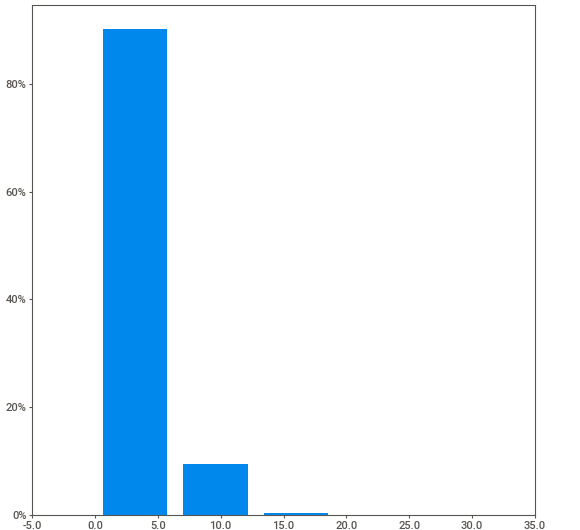
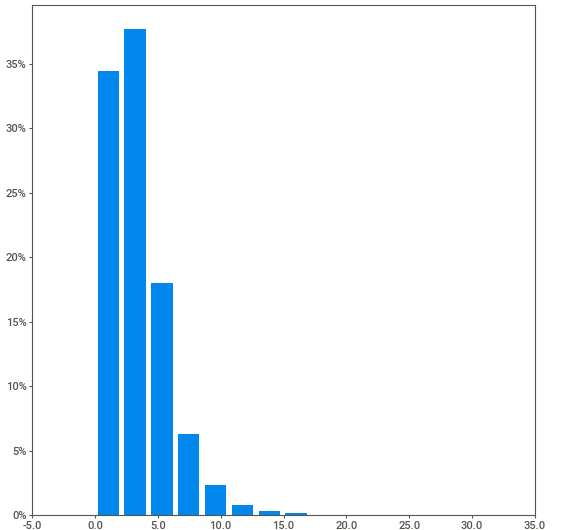
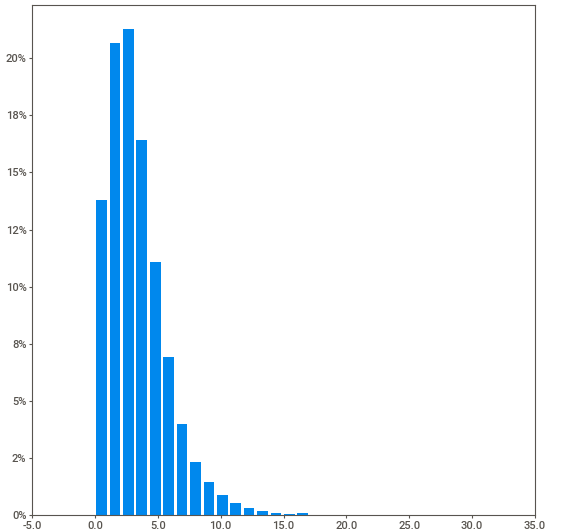
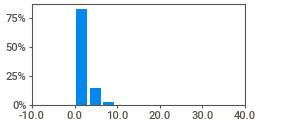
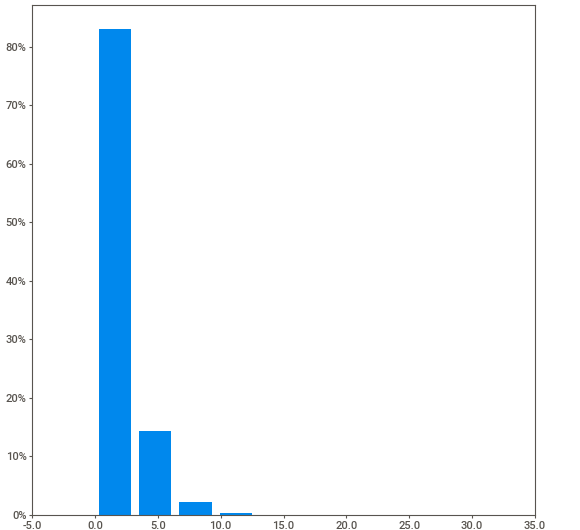
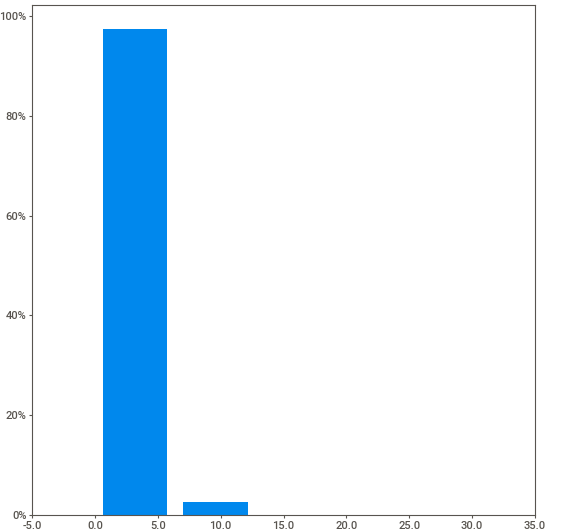
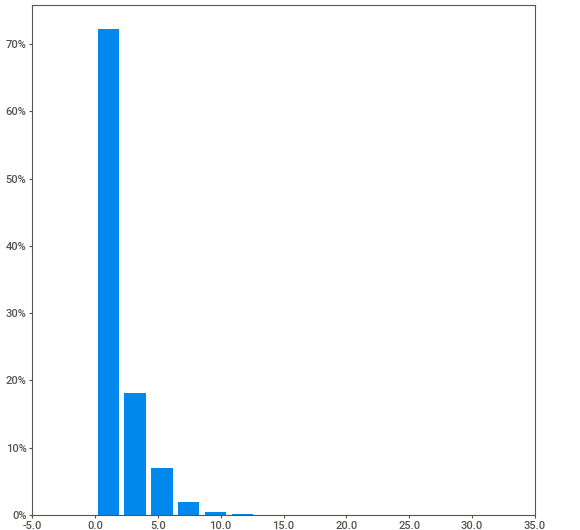
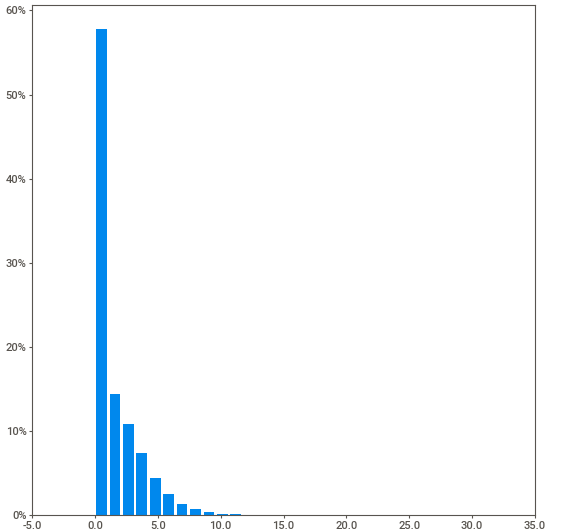
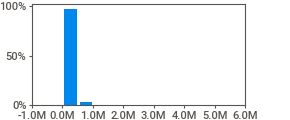
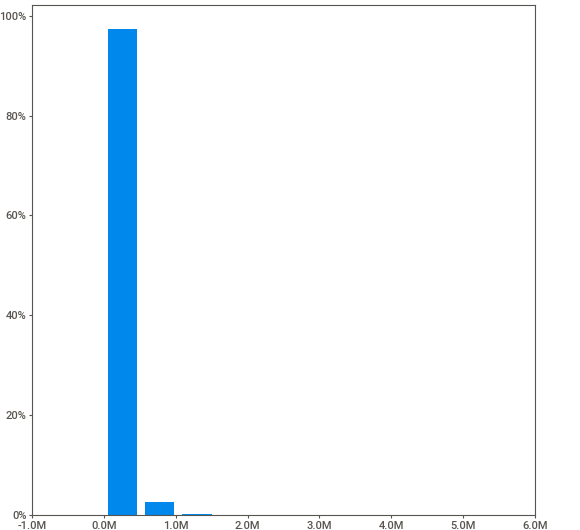
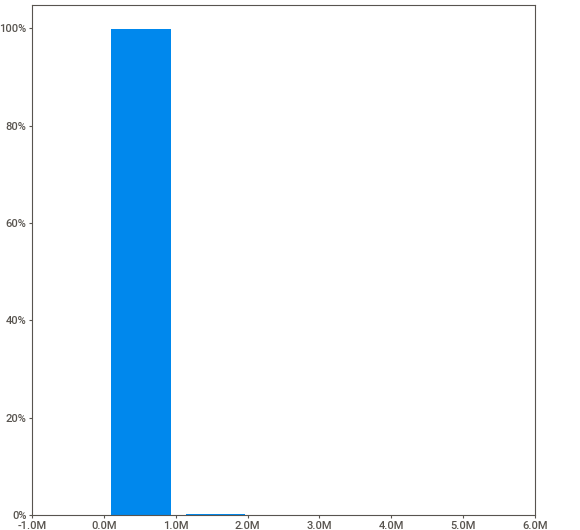
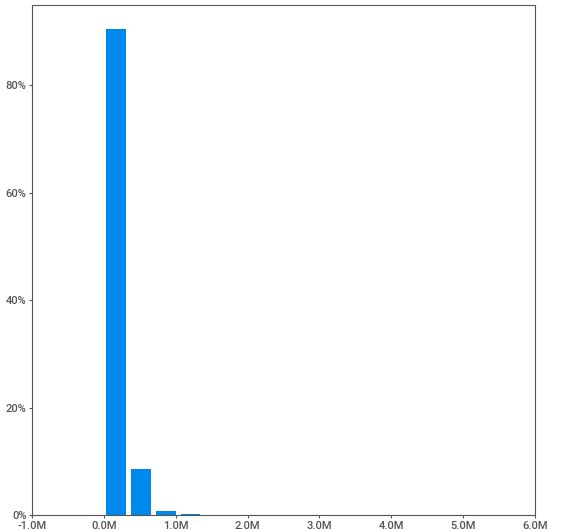
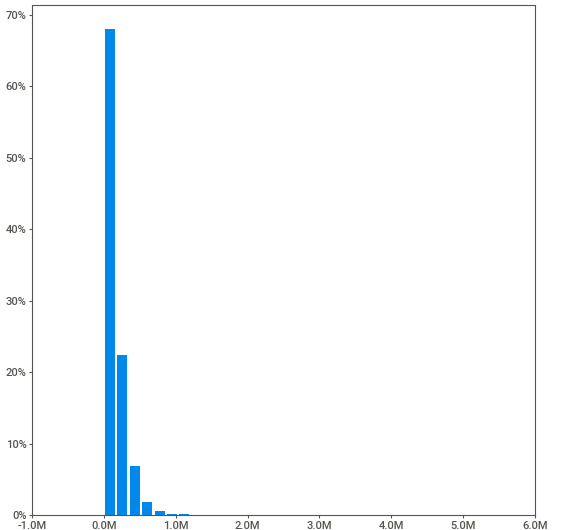
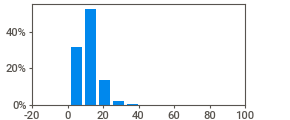
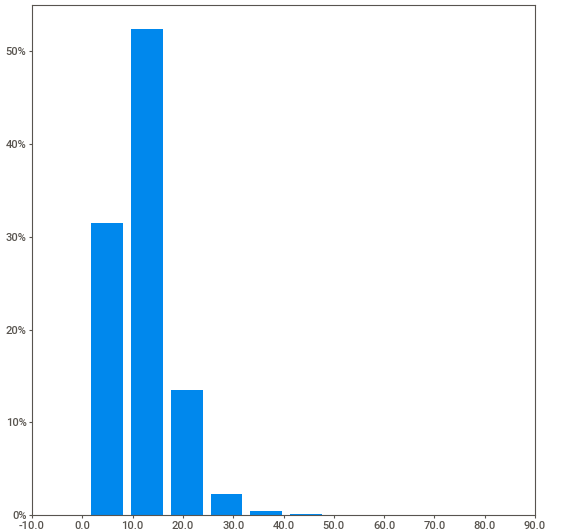
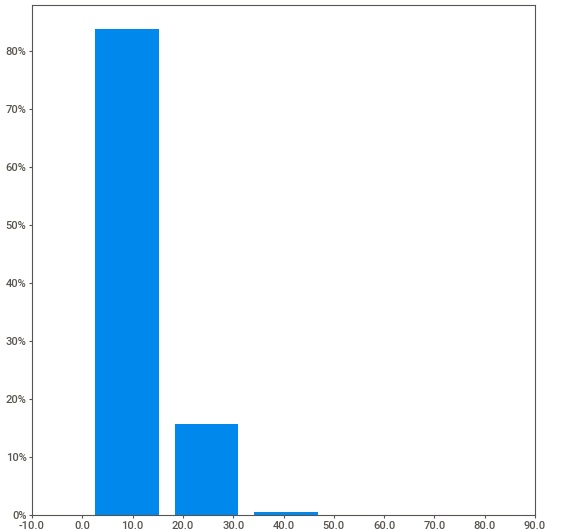
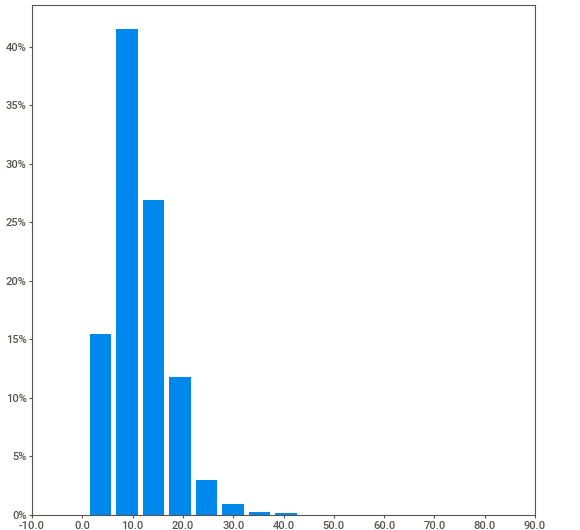
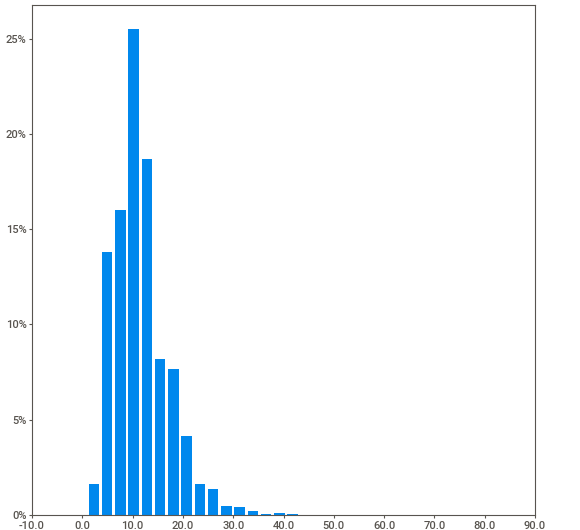
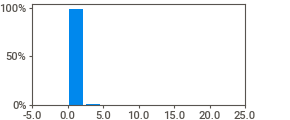
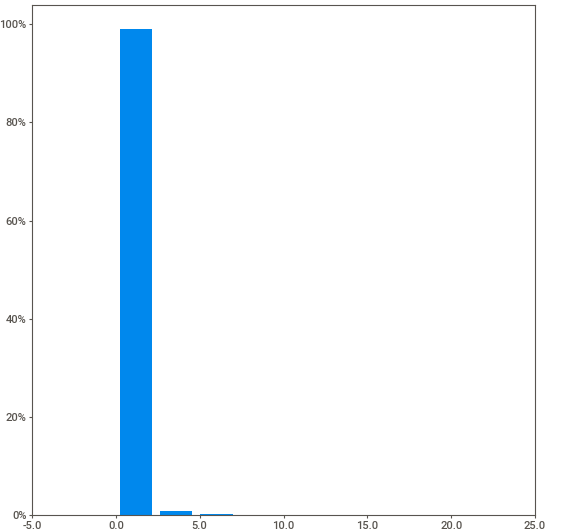
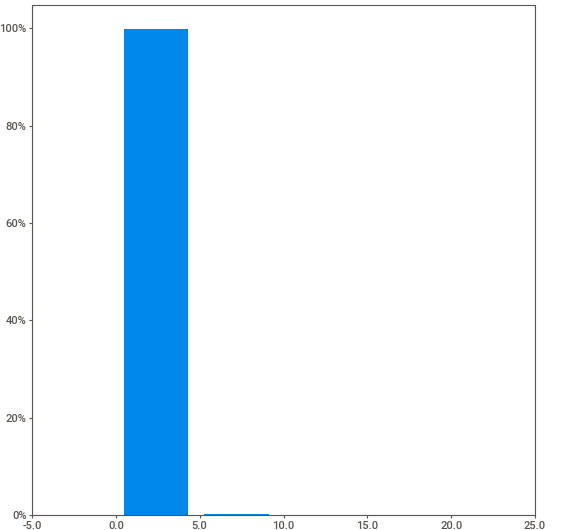
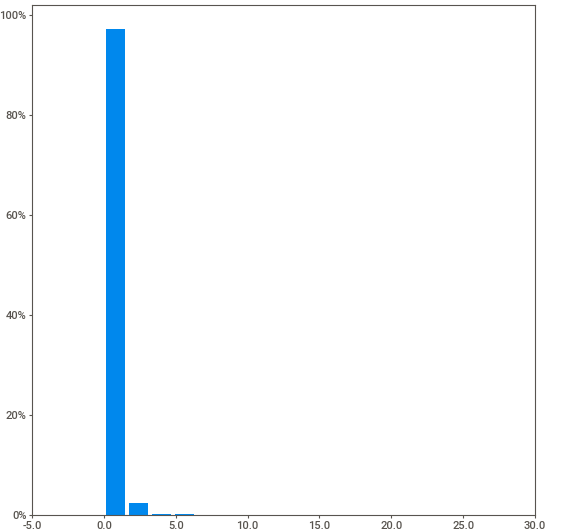
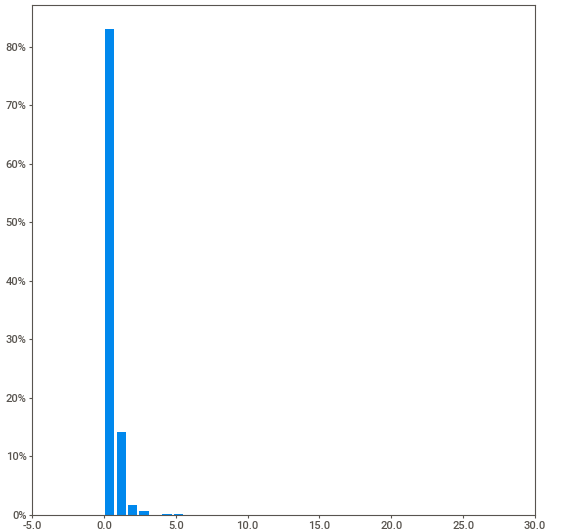
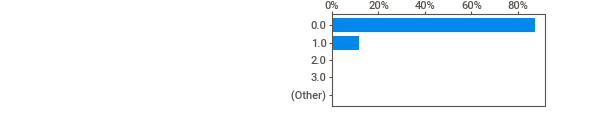
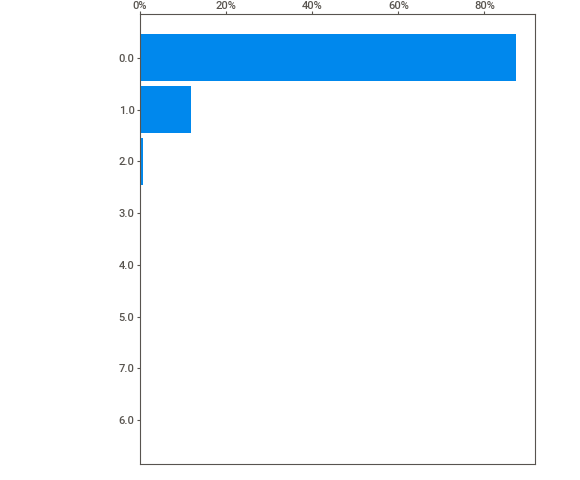
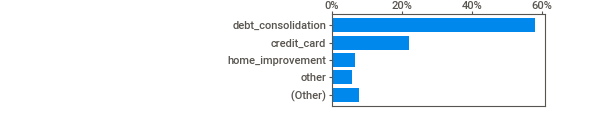
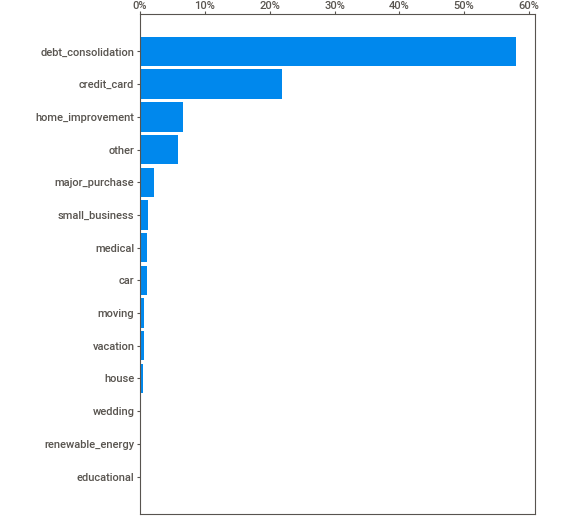
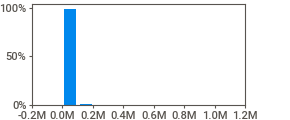
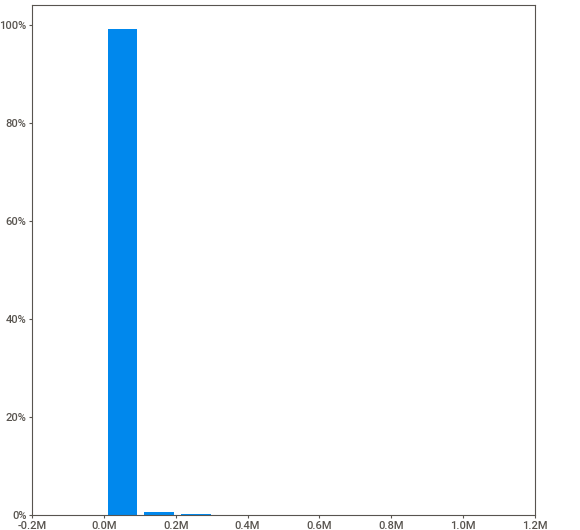
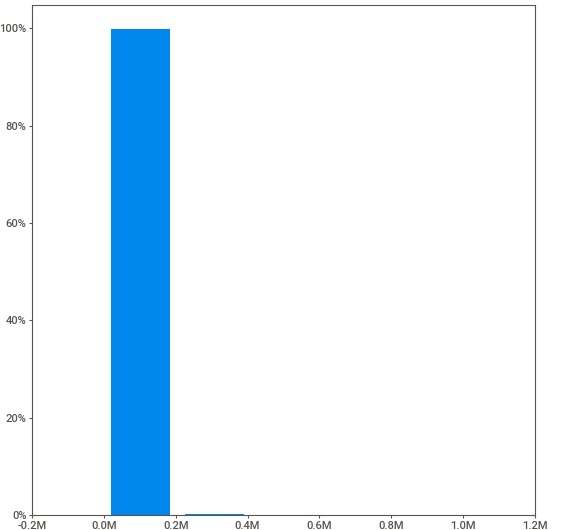
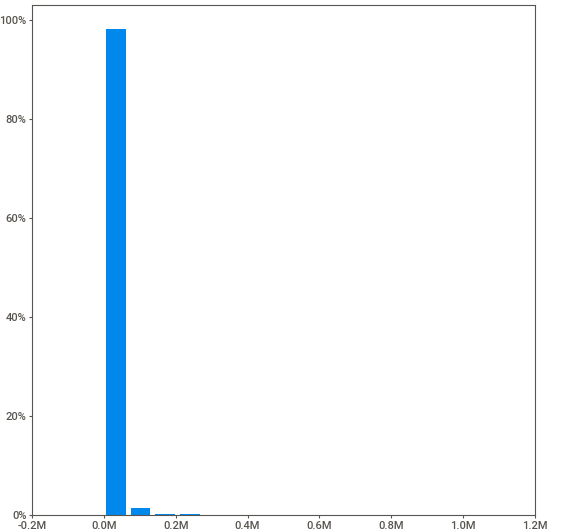
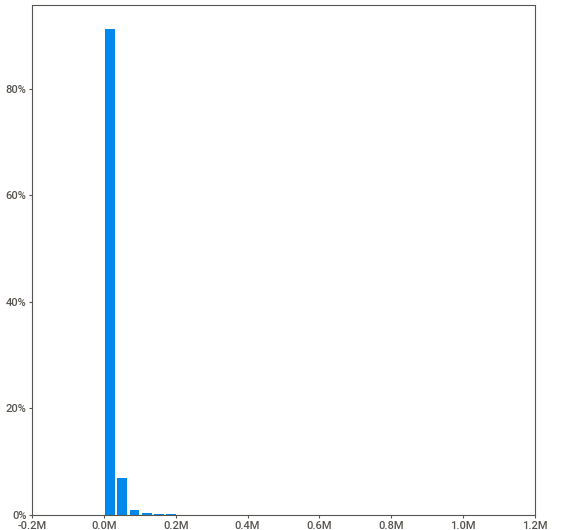
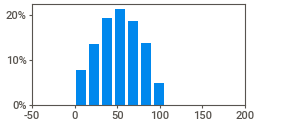
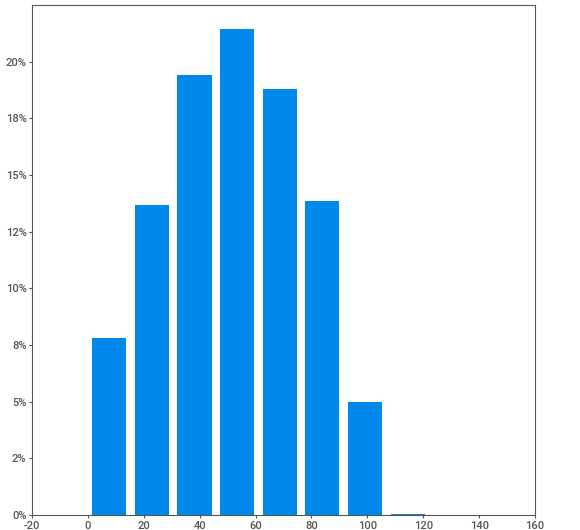
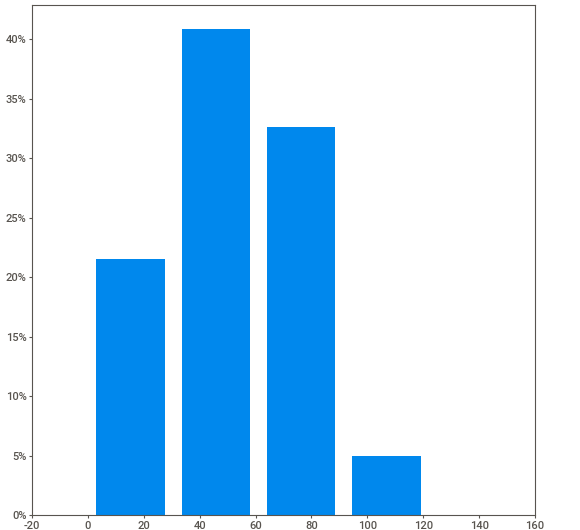
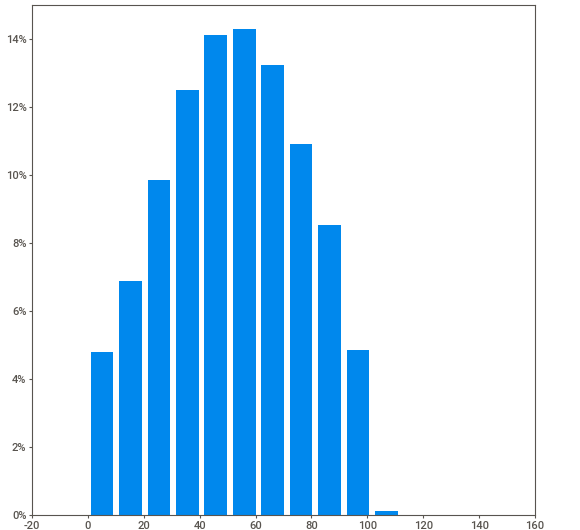
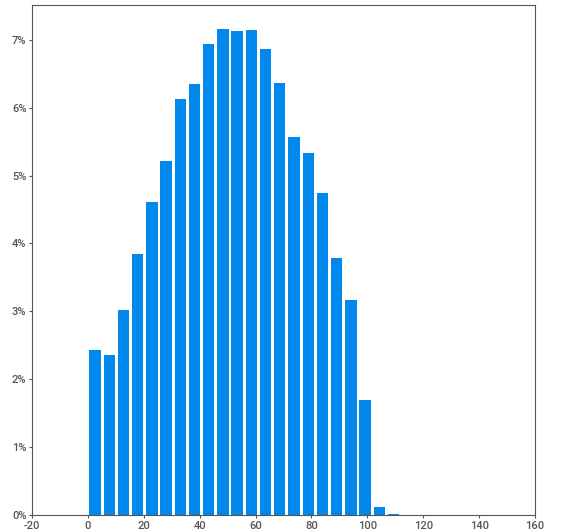
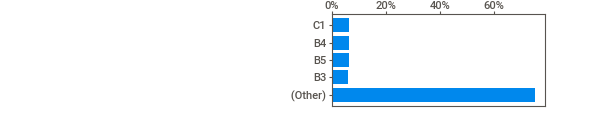
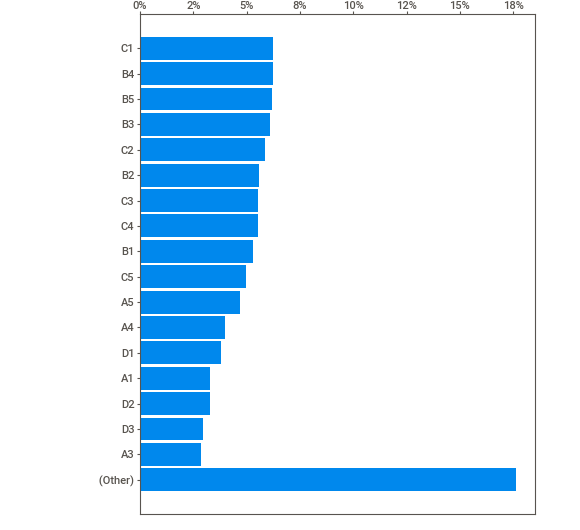
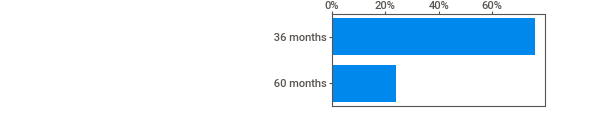
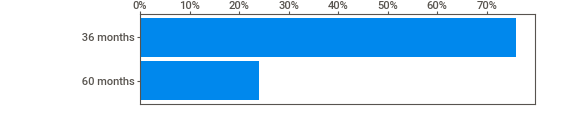
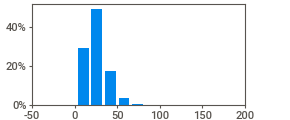
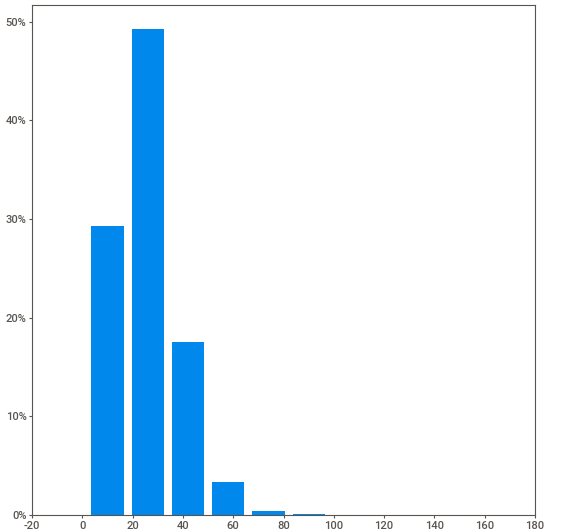
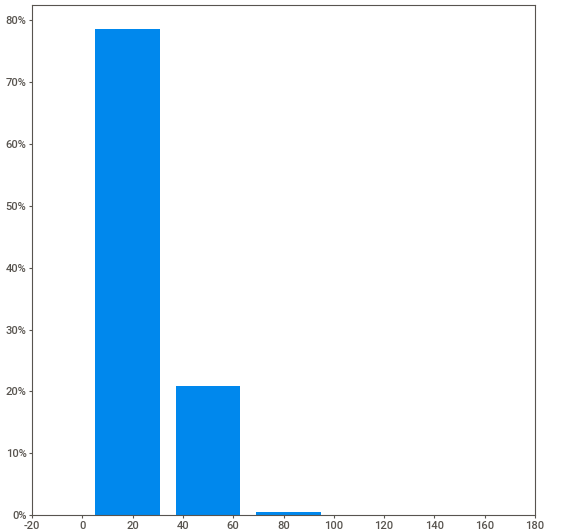
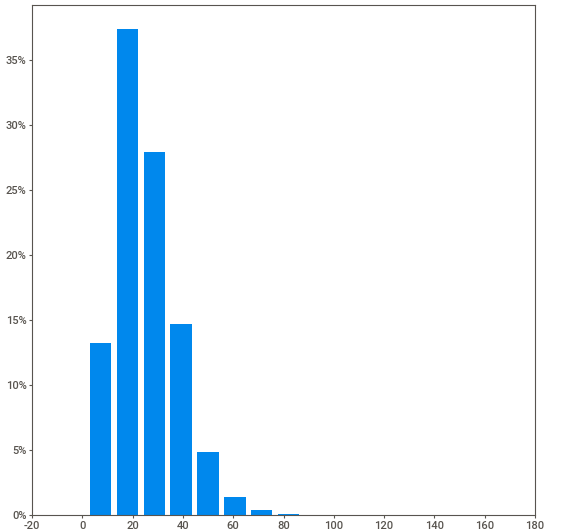
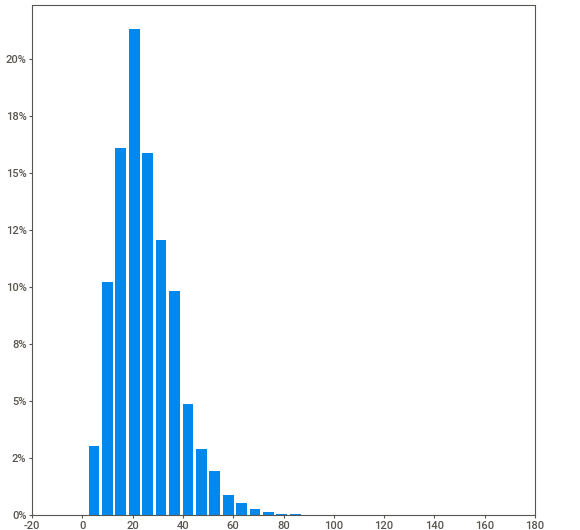
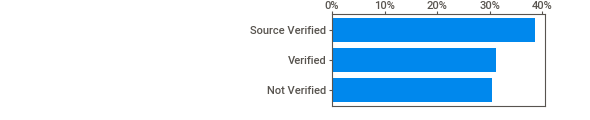
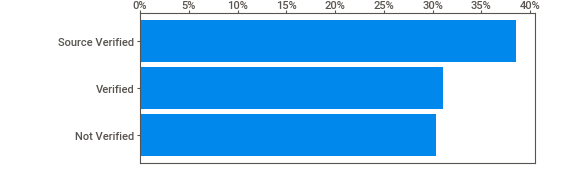
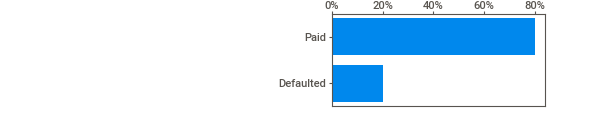
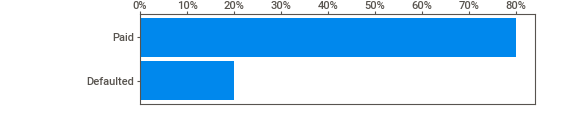
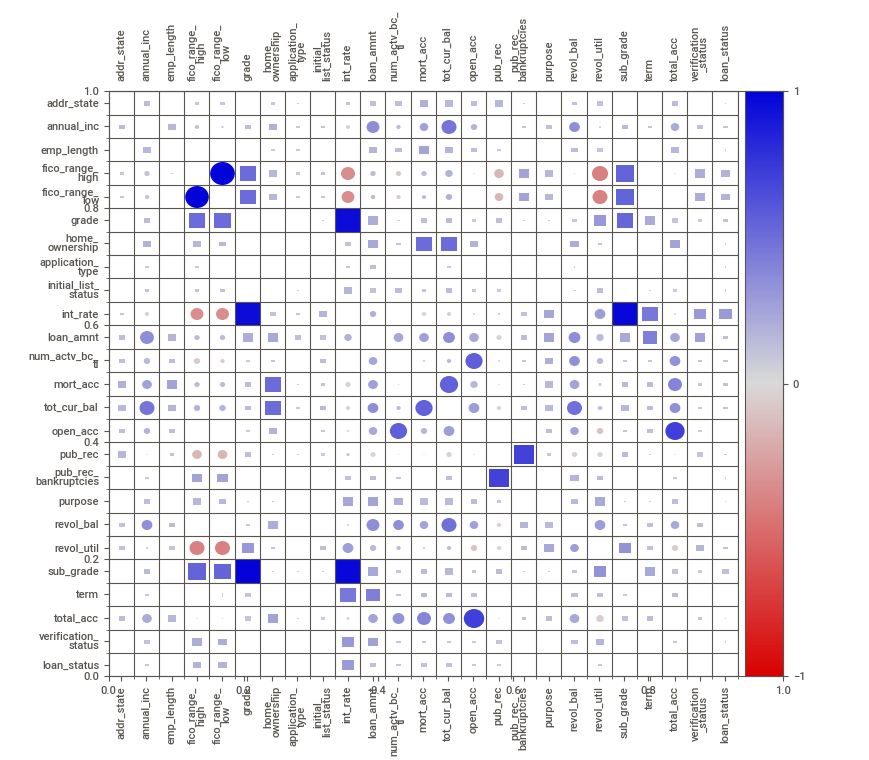
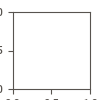

In [14]:
import sweetviz as sv
report = sv.analyze(df)
report.show_notebook()

# Ananlysis Numerical columns

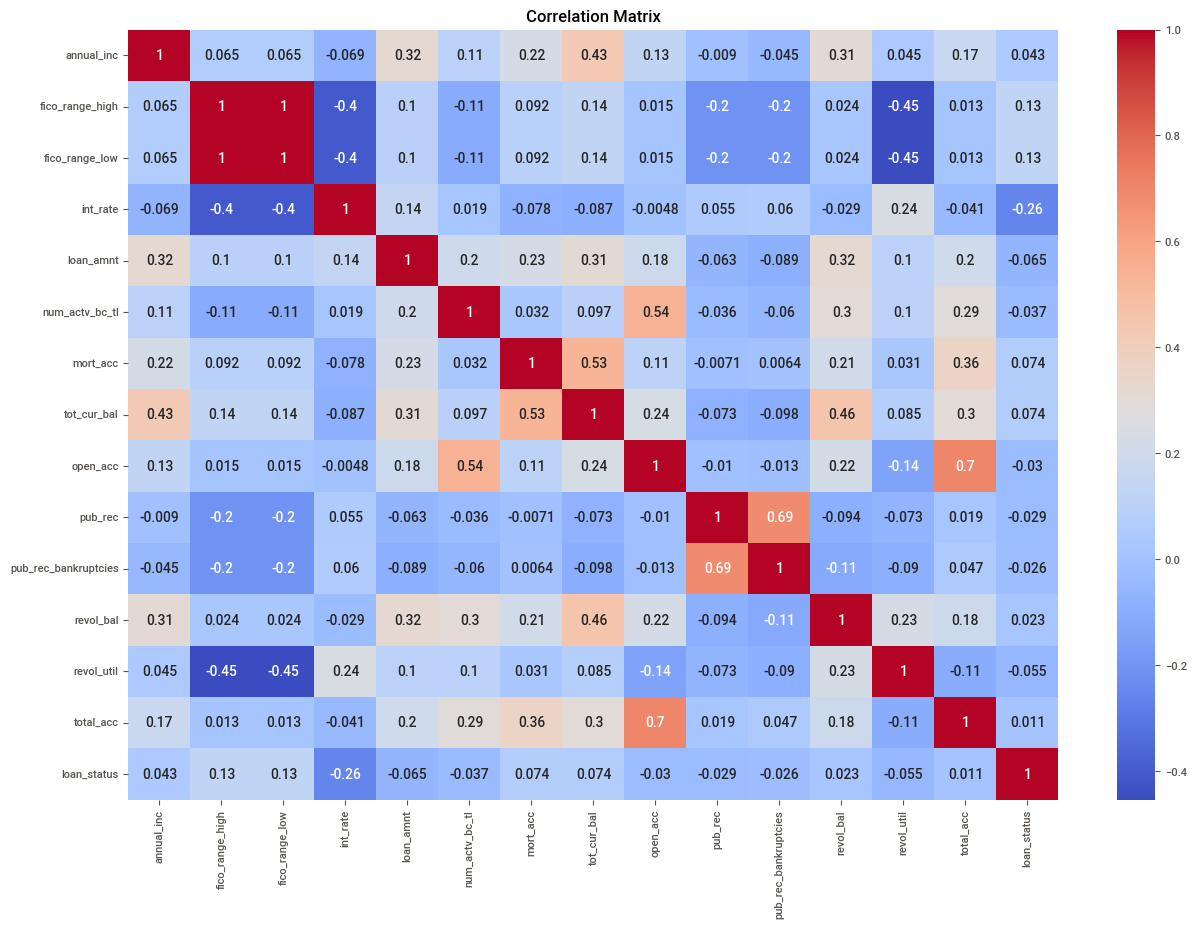

In [57]:
#correlation
df1=df.copy()
# Convert 'loan_status' to numerical values
df1['loan_status'] = df1['loan_status'].apply(lambda x: 1 if x == 'Paid' else 0)

# Calculate the correlation matrix for numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlations = df1[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Analysing the data by the help of **pviot table** so we creat a function table which is help to build the tabble to find the some relationship 

In [58]:
  # Creating the pivot table with count by the help of the function
def table(column):
    # Creating the pivot table with count
    pivot_table = pd.pivot_table(df, index=column, columns='loan_status', aggfunc='size', fill_value=0)
    pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
    pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)
    # Sorting the pivot table by the default percentage
    pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

    return pivot_table

## Define a function for creating the **box** plot


In [59]:
# creating a function for creating the box plot
def plot_boxplot(column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column} by loan_status')

## Befine a function here for ploting the **histogram**

In [63]:
def plot_histogram(column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='loan_status')
    plt.title(f'Histogram of {column} by loan_status')

## Define the function  for **Count plot** for creating the plot

In [64]:
def plot_countplot(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='loan_status')
    plt.title(f'Countplot of {column} by loan_status')

## Creating the hist plot

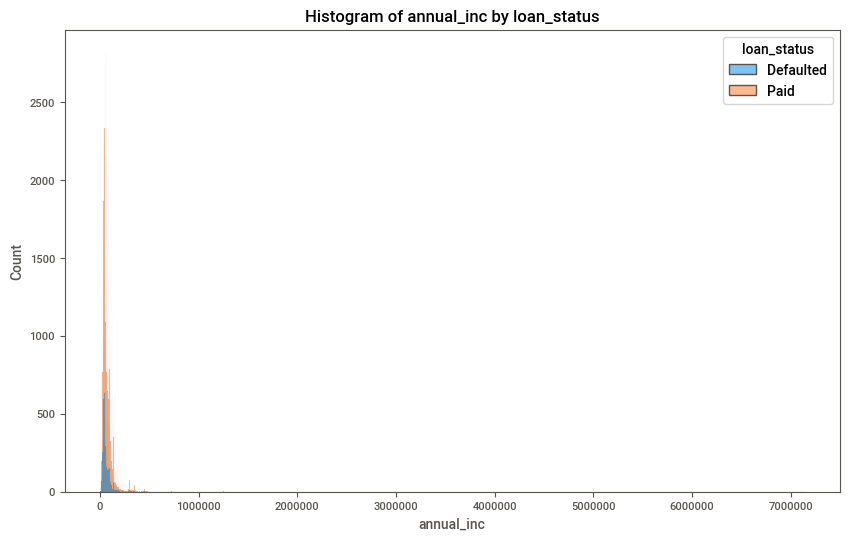

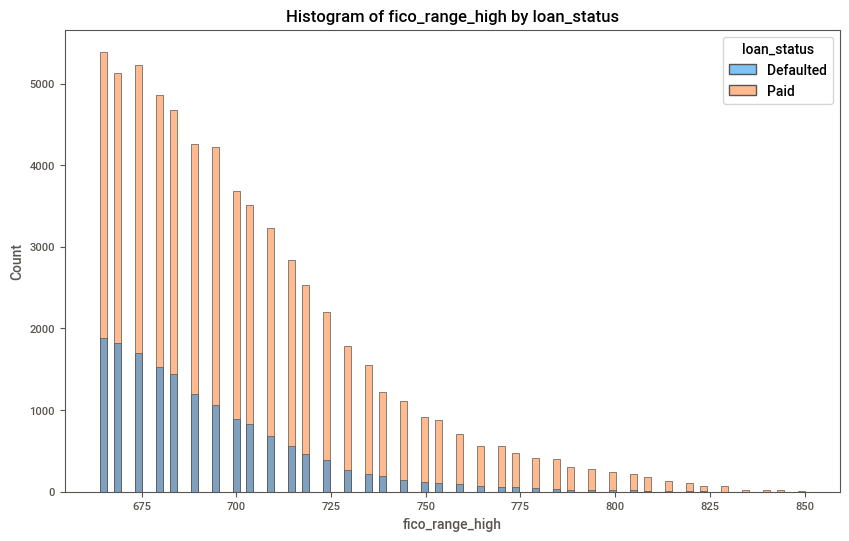

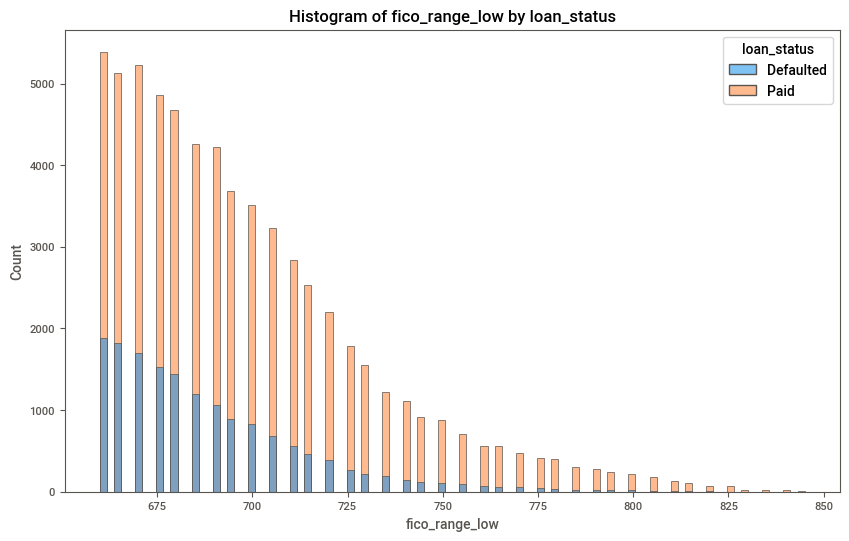

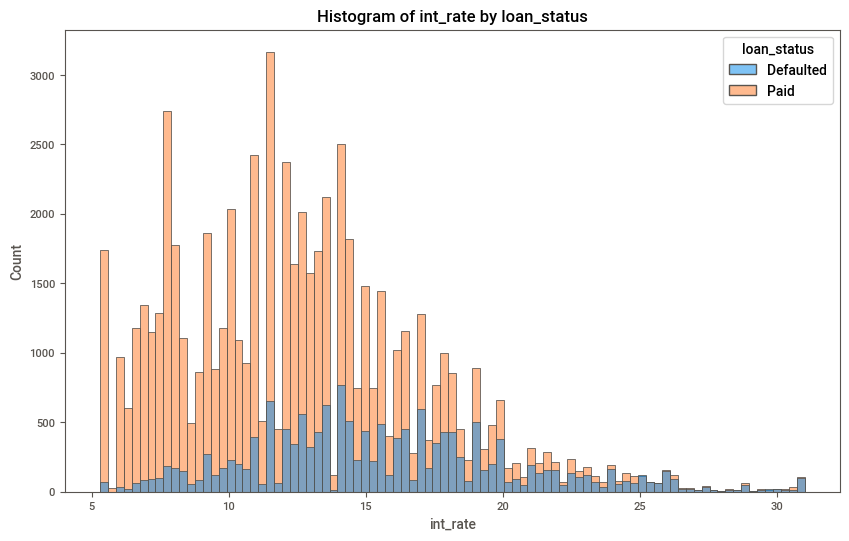

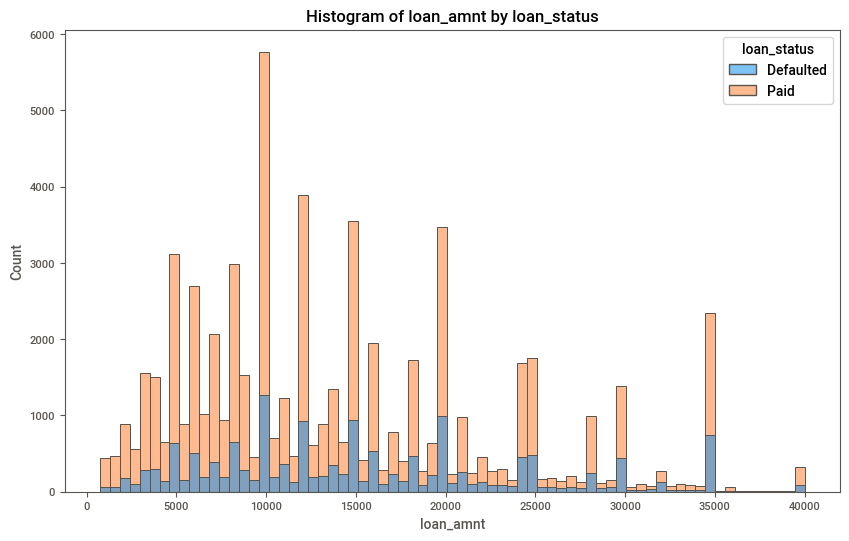

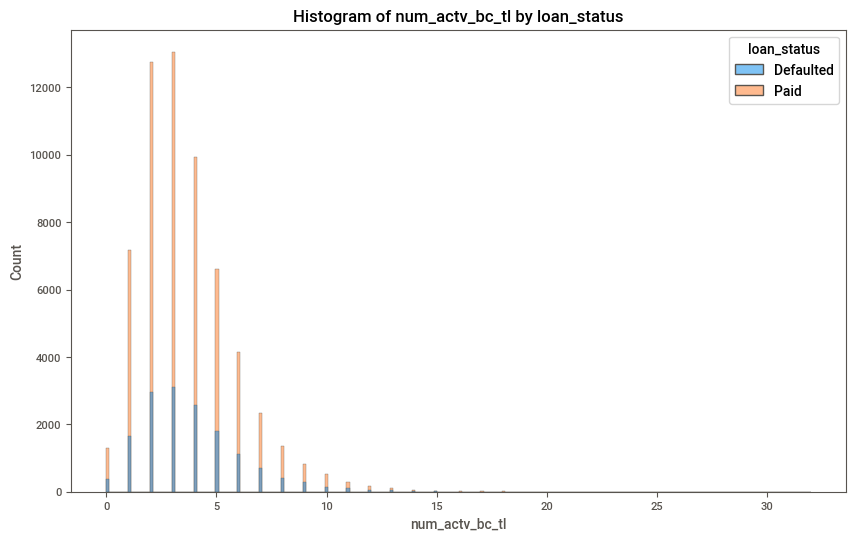

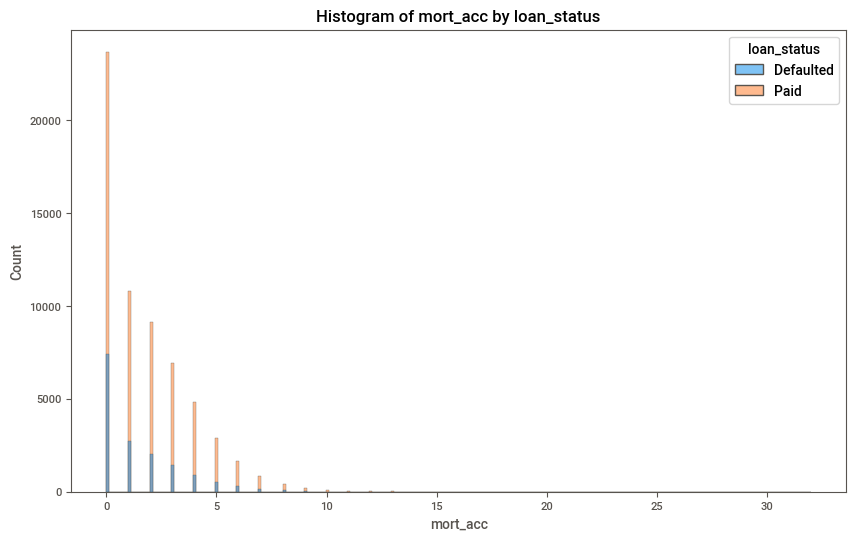

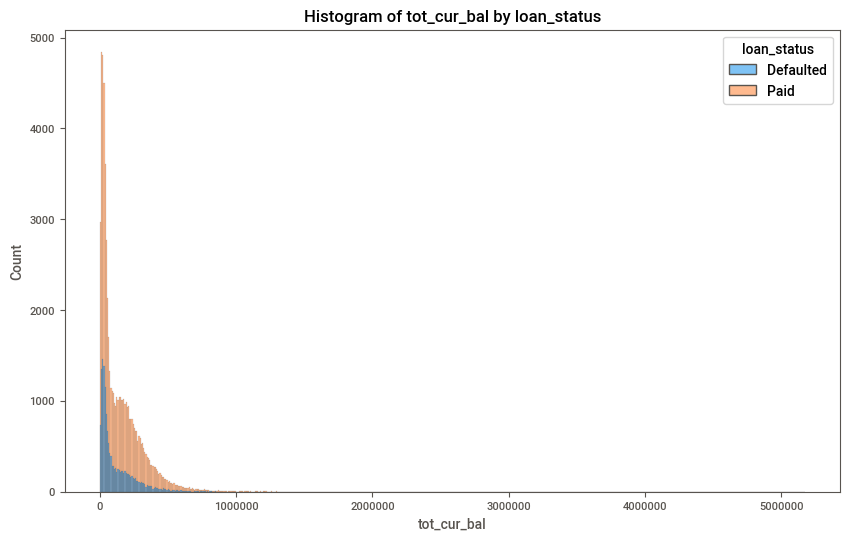

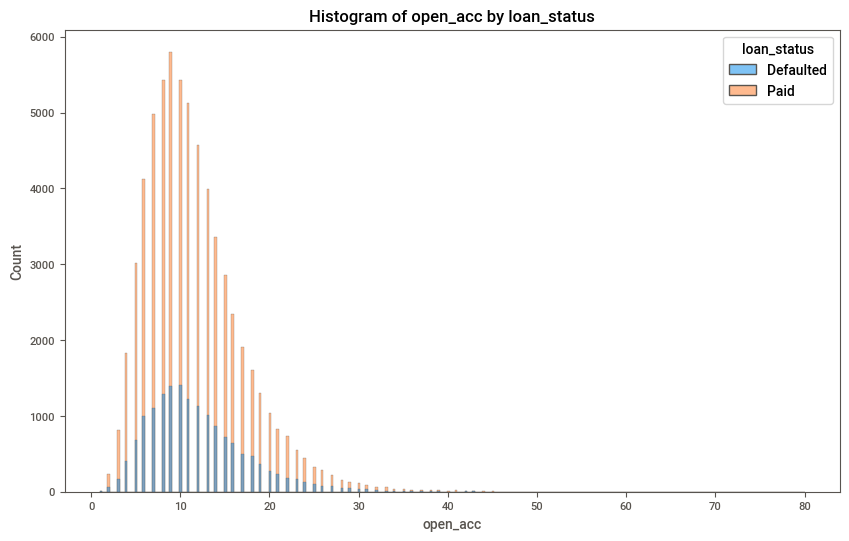

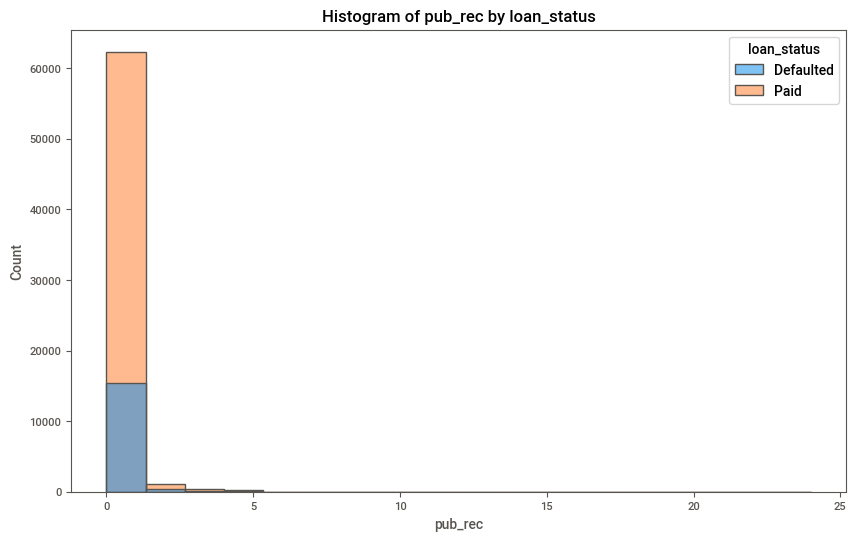

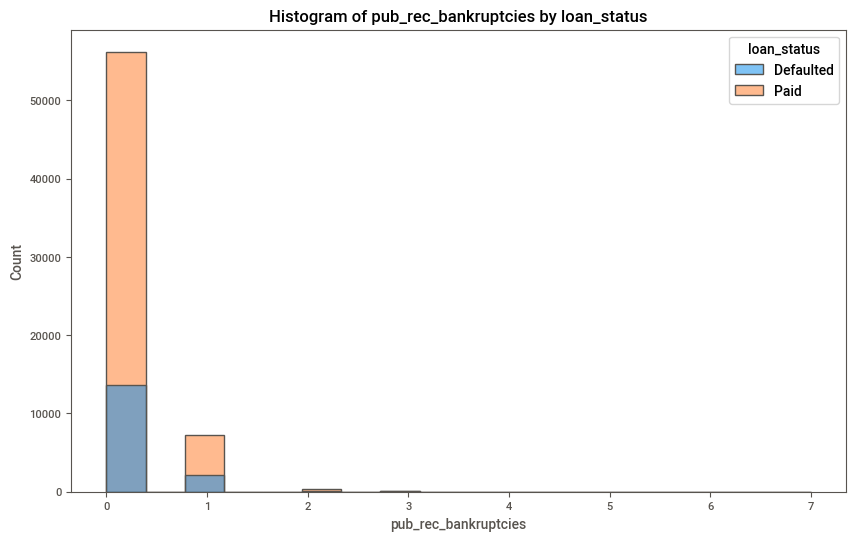

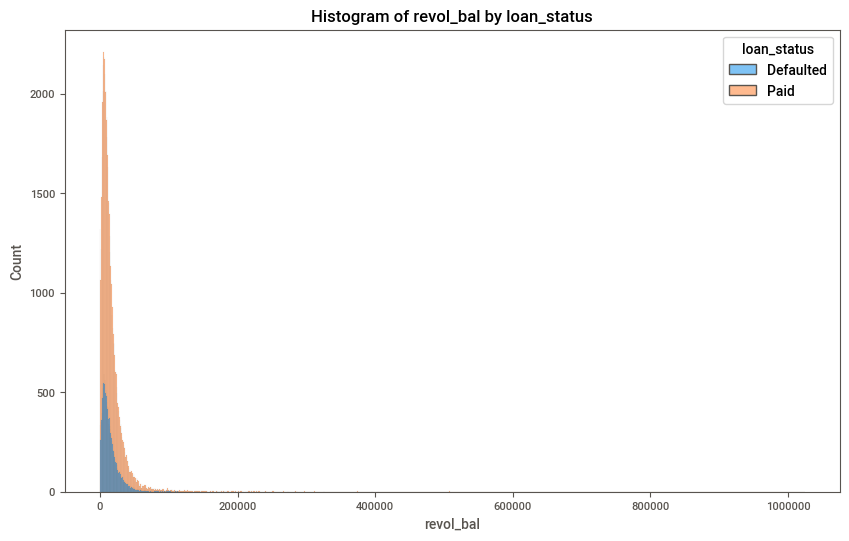

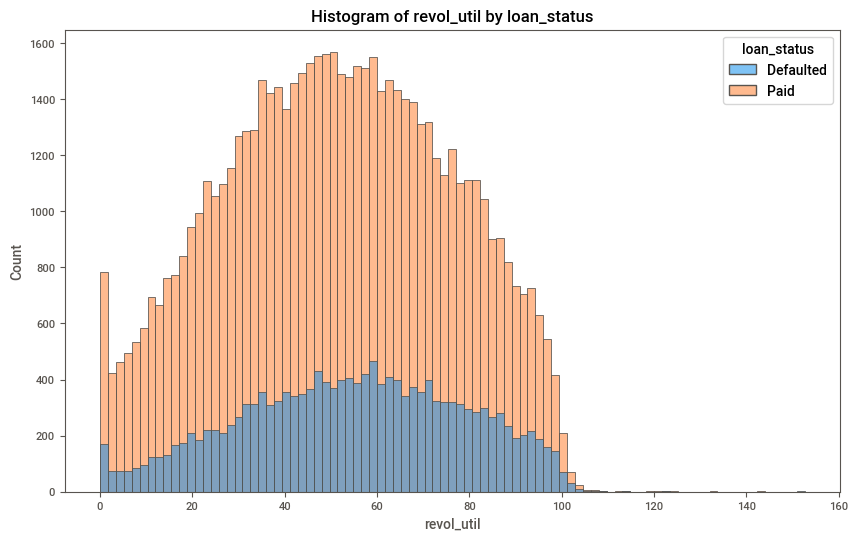

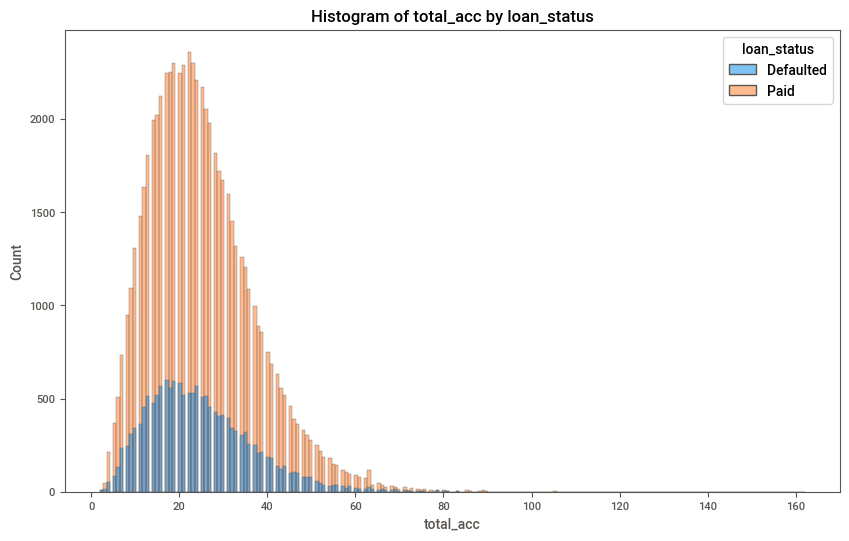

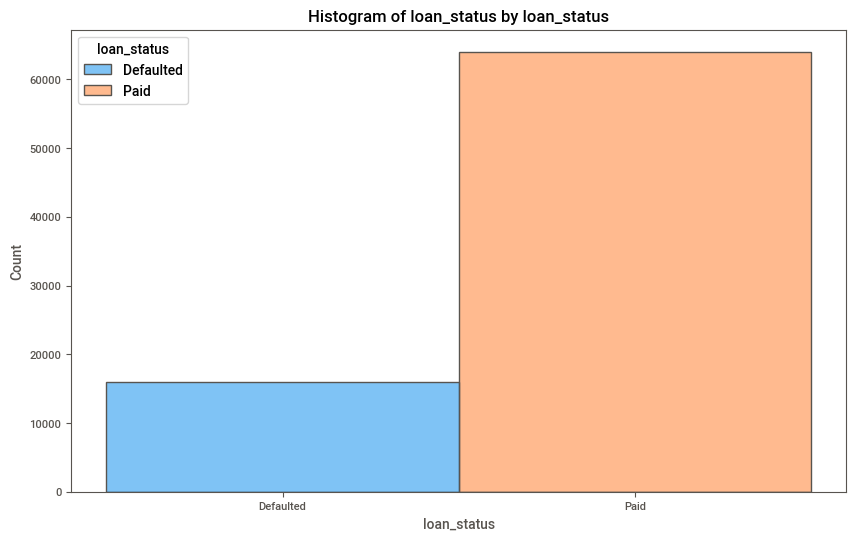

In [62]:
# Plot histograms for each numerical column with hue='loan_status'
for column in numerical_columns:
    plot_histogram(column)

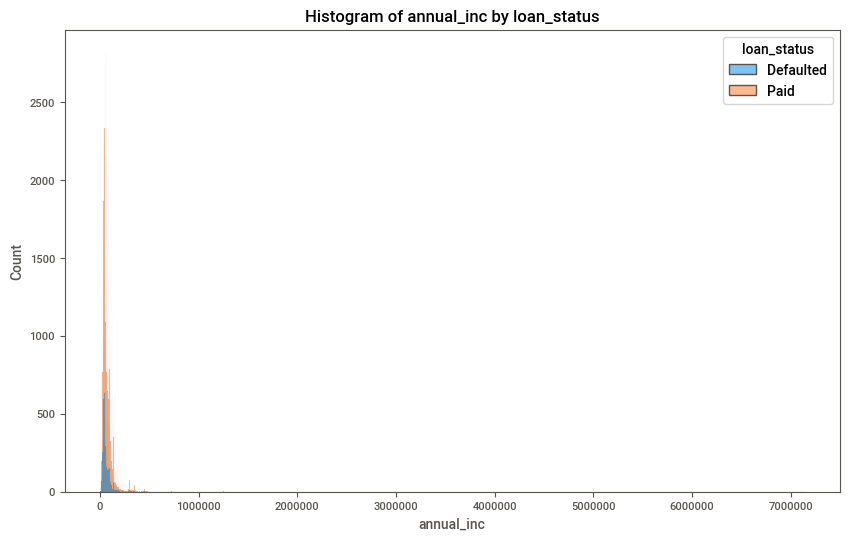

In [28]:
plot_histogram('annual_inc')

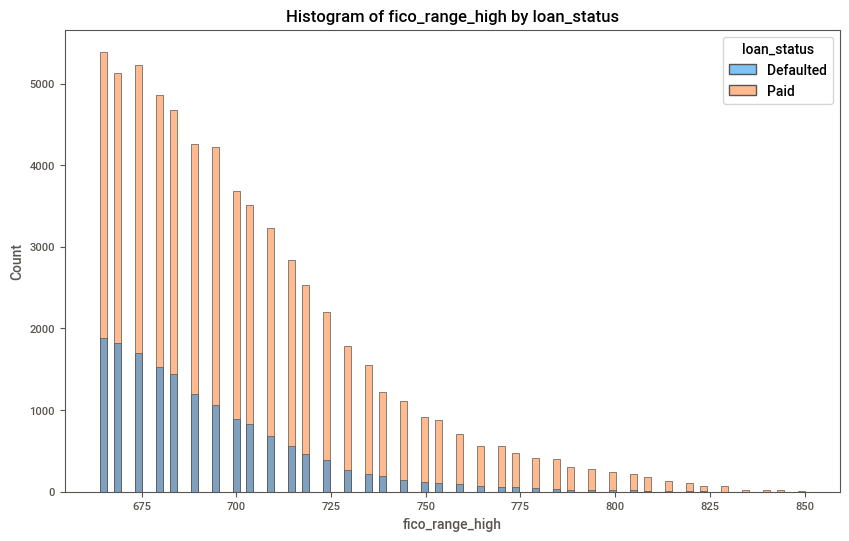

In [29]:
plot_histogram('fico_range_high')

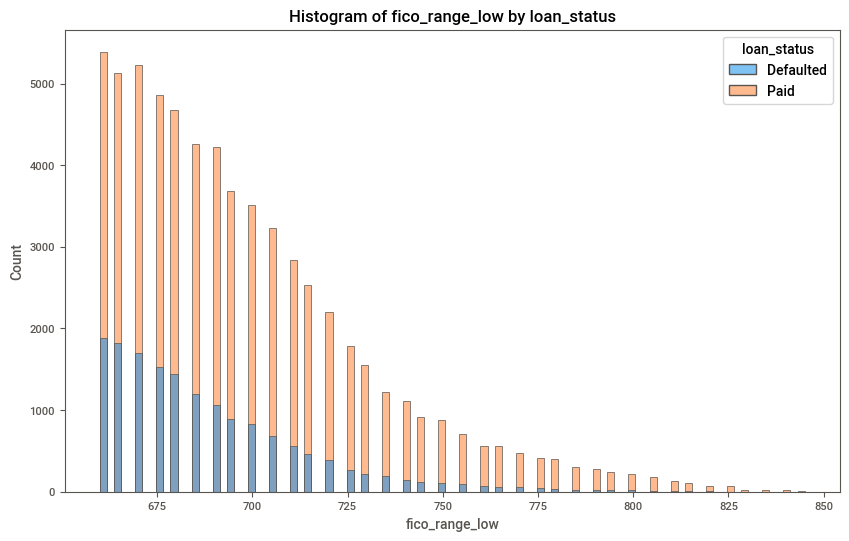

In [30]:
plot_histogram('fico_range_low')

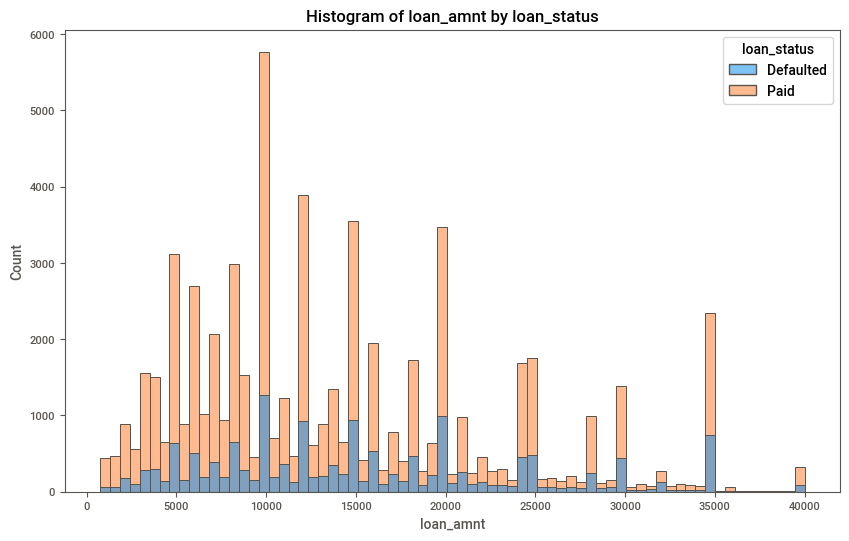

In [31]:
plot_histogram('loan_amnt')

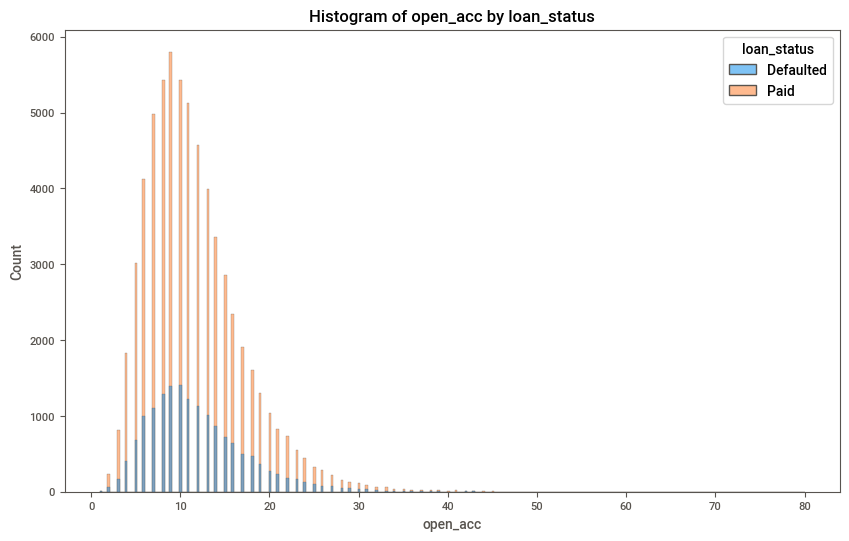

In [32]:
plot_histogram('open_acc')

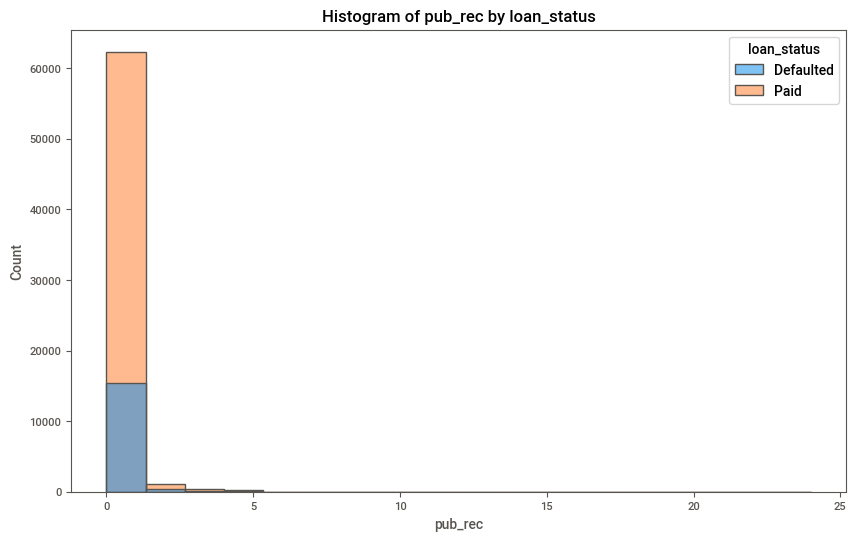

In [65]:
plot_histogram('pub_rec')

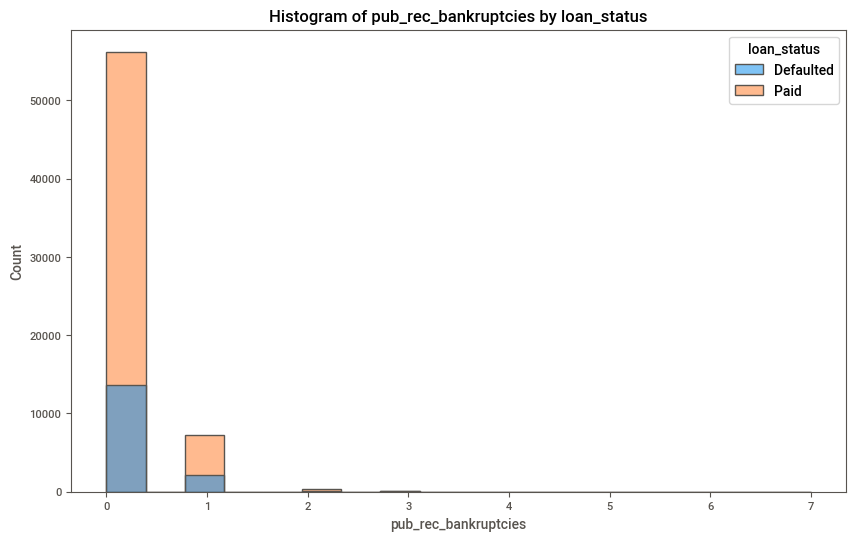

In [34]:
plot_histogram('pub_rec_bankruptcies')

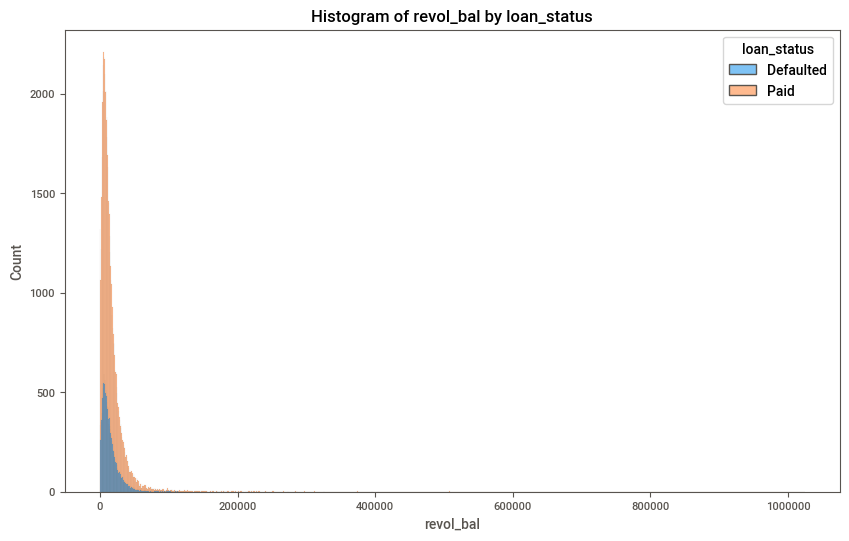

In [35]:

plot_histogram('revol_bal')

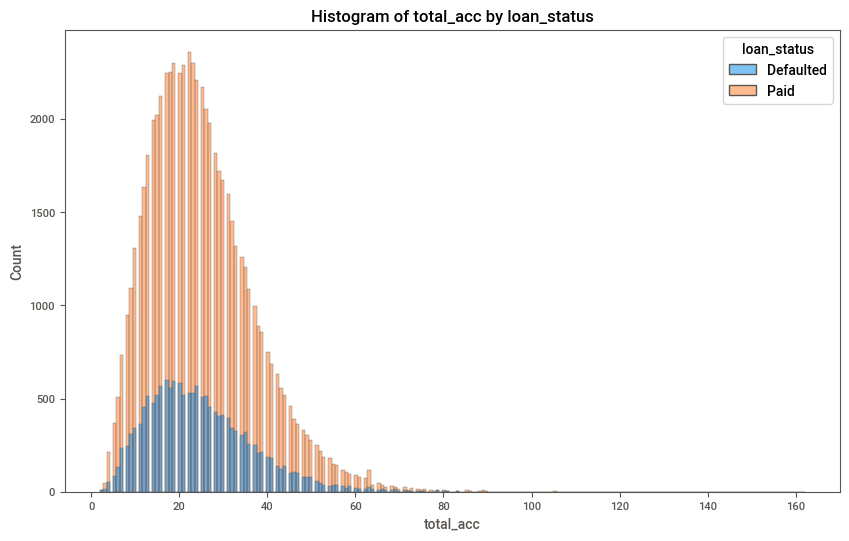

In [36]:
plot_histogram('total_acc')

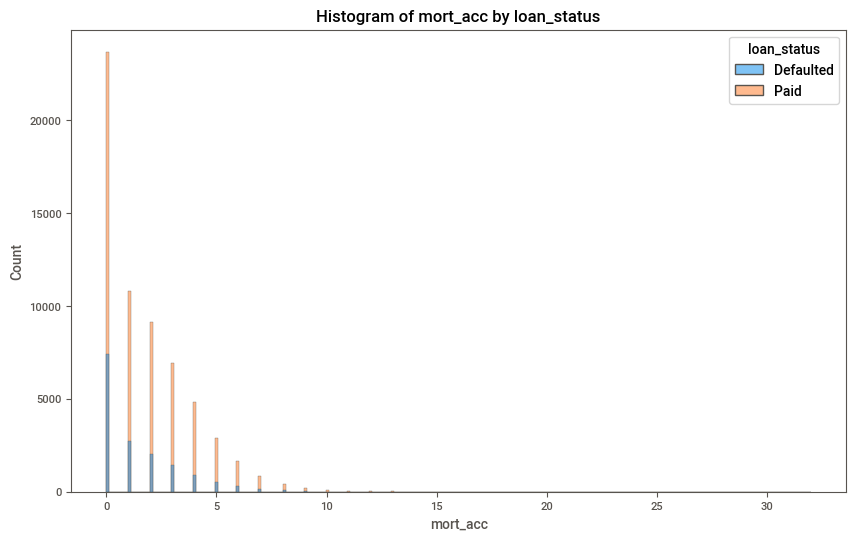

In [46]:
plot_histogram('mort_acc')

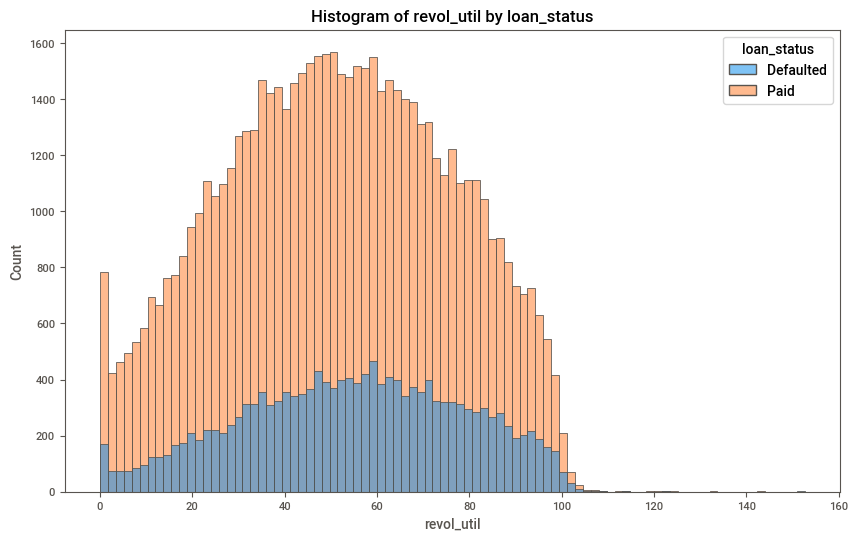

In [47]:
plot_histogram('revol_util')

In [16]:
numerical_columns

Index(['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util',
       'total_acc'],
      dtype='object')

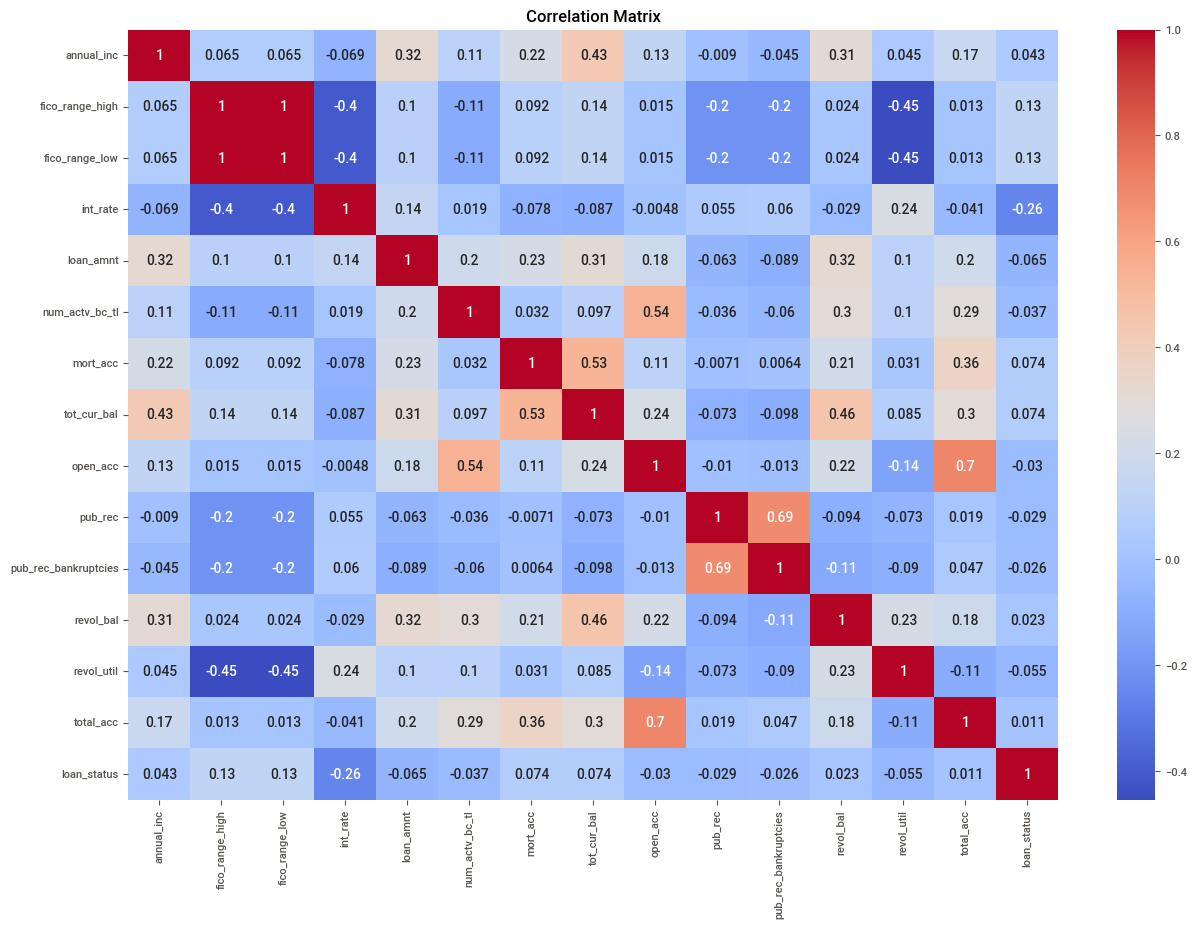

In [ ]:
#correlation
df1=df.copy()
# Convert 'loan_status' to numerical values
df1['loan_status'] = df1['loan_status'].apply(lambda x: 1 if x == 'Paid' else 0)

# Calculate the correlation matrix for numerical columns
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
correlations = df1[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


import the some sklearn function to do some opretion

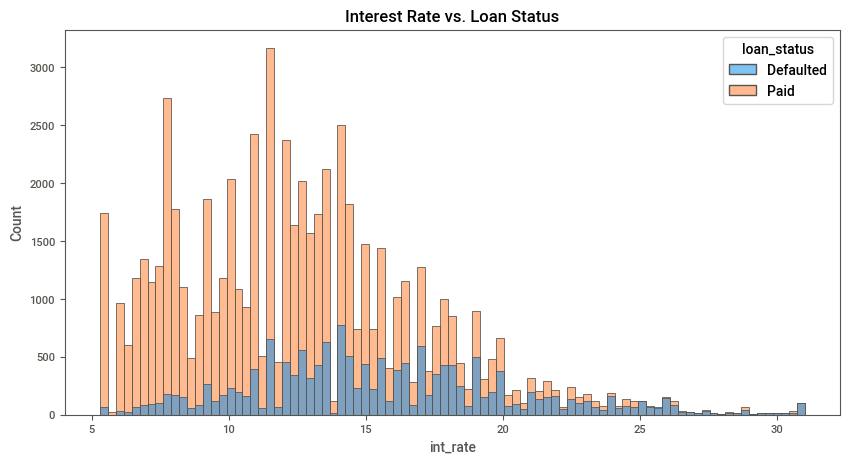

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='',hue='loan_status', data=df)
plt.title('Interest Rate vs. Loan Status')
plt.show()


In this plot we can easily see that if the interest rate of loan is so high that the loan default increases

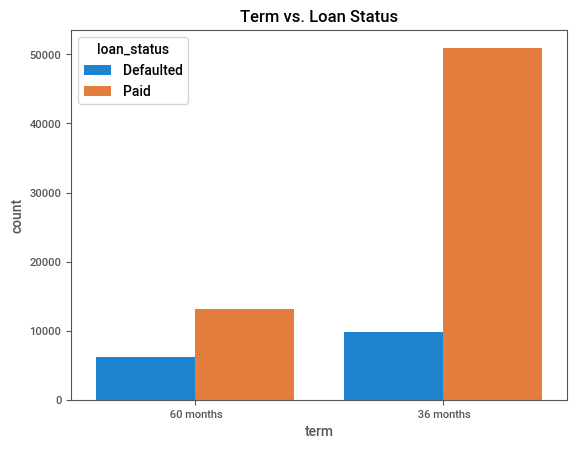

In [ ]:
sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Term vs. Loan Status')
plt.show()

In this plot the loan tenure is increased, loan defaults will increase

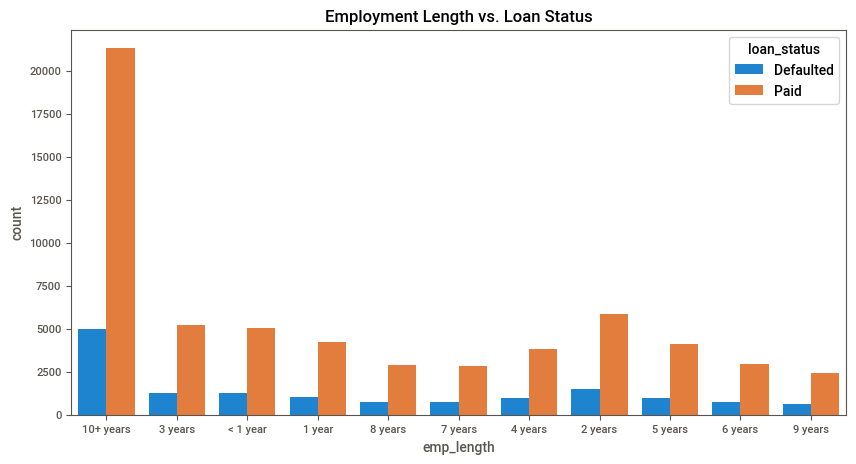

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.title('Employment Length vs. Loan Status')
plt.show()


In this graph we can see if you have long working experience then you should take loan than other which increases the number of defaulter but it does not provide good information about defaulter and paid customer.

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='home_ownership', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status     Defaulted   Paid  Total  Default Percentage
home_ownership                                             
OTHER                   4      3      7               57.14
RENT                 7402  24286  31688               23.36
OWN                  1779   6875   8654               20.56
MORTGAGE             6783  32845  39628               17.12
ANY                     2     17     19               10.53
NONE                    0      4      4                0.00

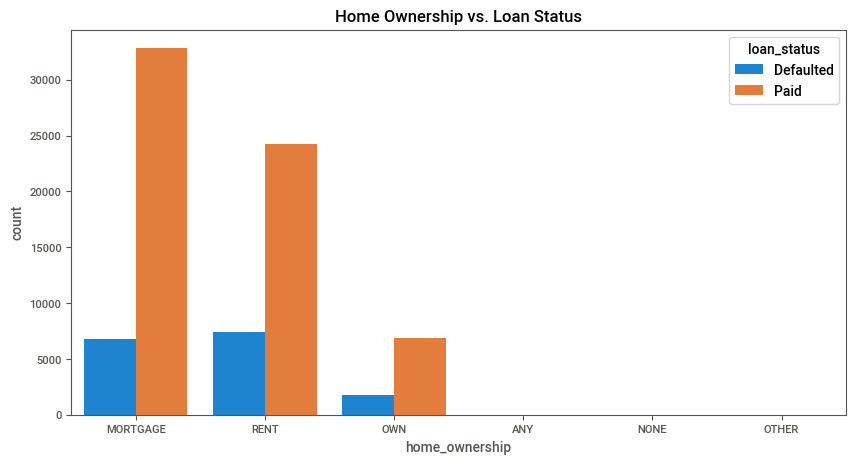

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title('Home Ownership vs. Loan Status')
plt.show()


In this graph, we can see the increase in number of persons having mortgage, rent and own house but the number of defaulters among rented persons is more than others.

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='purpose', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status         Defaulted   Paid  Total  Default Percentage
purpose                                                        
small_business            297    653    950               31.26
renewable_energy           16     38     54               29.63
house                      99    314    413               23.97
moving                    130    418    548               23.72
other                     991   3692   4683               21.16
debt_consolidation       9709  36709  46418               20.92
vacation                  105    413    518               20.27
medical                   176    726    902               19.51
home_improvement         1001   4267   5268               19.00
educational                 3     13     16               18.75
major_purchase            325   1421   1746               18.61
credit_card              2972  14534  17506               16.98
car                       134    734    868               15.44
wedding                    12     98    110               10.91

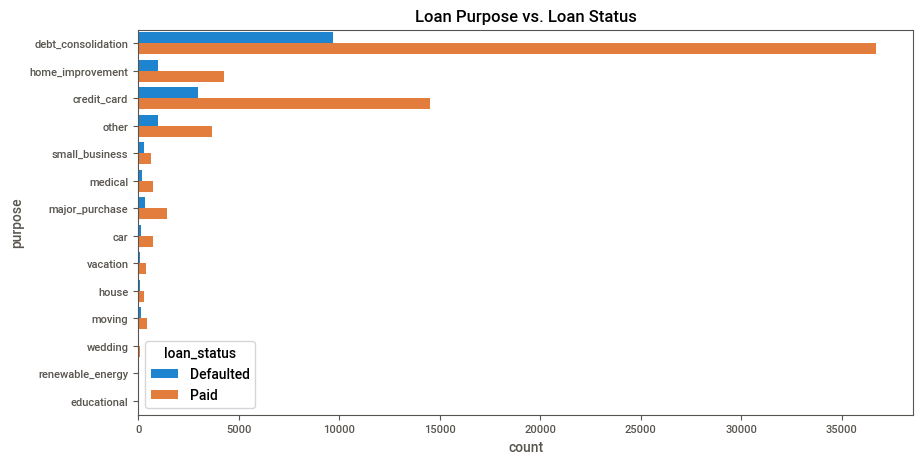

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(y='purpose', hue='loan_status', data=df)
plt.title('Loan Purpose vs. Loan Status')
plt.show()


In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='addr_state', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status  Defaulted  Paid  Total  Default Percentage
addr_state                                             
MS                 105   268    373               28.15
NE                  66   174    240               27.50
AL                 246   740    986               24.95
OK                 177   548    725               24.41
LA                 221   707    928               23.81
AR                 140   450    590               23.73
NV                 288   936   1224               23.53
TN                 271   936   1207               22.45
VT                  40   141    181               22.10
FL                1225  4393   5618               21.80
NY                1407  5054   6461               21.78
ID                  23    83    106               21.70
DE                  47   172    219               21.46
MD                 385  1417   1802               21.37
VA                 479  1770   2249               21.30
PA                 569  2107   2676               21.26
MI                 438  1653   2091               20.95
NM                  92   348    440               20.91
NJ                 595  2258   2853               20.86
MO                 268  1030   1298               20.65
KY                 172   664    836               20.57
NC                 468  1823   2291               20.43
IN                 270  1059   1329               20.32
HI                  82   322    404               20.30
OH                 518  2057   2575               20.12
CA                2335  9409  11744               19.88
MN                 274  1140   1414               19.38
WI                 202   841   1043               19.37
AZ                 385  1608   1993               19.32
RI                  67   289    356               18.82
ND                  16    69     85               18.82
GA                 476  2054   2530               18.81
TX                1221  5272   6493               18.80
MA                 345  1517   1862               18.53
IL                 558  2540   3098               18.01
CT                 201   942   1143               17.59
MT                  40   189    229               17.47
SC                 174   833   1007               17.28
NH                  64   309    373               17.16
UT                  90   464    554               16.25
WA                 276  1460   1736               15.90
SD                  30   162    192               15.62
KS                  99   550    649               15.25
CO                 270  1520   1790               15.08
WY                  26   161    187               13.90
WV                  37   231    268               13.81
ME                  15    95    110               13.64
OR                 129   896   1025               12.59
DC                  24   177    201               11.94
AK                  24   191    215               11.16
IA                   0     1      1                0.00

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='grade', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status  Defaulted   Paid  Total  Default Percentage
grade                                                   
G                  257    279    536               47.95
F                  839   1046   1885               44.51
E                 2156   3464   5620               38.36
D                 3648   8288  11936               30.56
C                 5077  17448  22525               22.54
B                 3174  20328  23502               13.51
A                  819  13177  13996                5.85

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='application_type', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status       Defaulted   Paid  Total  Default Percentage
application_type                                             
Joint App               422   1132   1554               27.16
Individual            15548  62898  78446               19.82

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='initial_list_status', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status          Defaulted   Paid  Total  Default Percentage
initial_list_status                                             
w                         9472  37273  46745               20.26
f                         6498  26757  33255               19.54

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='sub_grade', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status  Defaulted  Paid  Total  Default Percentage
sub_grade                                              
G5                  28    19     47               59.57
G4                  40    38     78               51.28
G3                  40    42     82               48.78
F5                 117   125    242               48.35
F4                 135   157    292               46.23
G1                  81    97    178               45.51
F1                 257   309    566               45.41
G2                  68    83    151               45.03
F3                 149   205    354               42.09
F2                 181   250    431               42.00
E5                 371   522    893               41.55
E4                 369   542    911               40.50
E3                 426   681   1107               38.48
E2                 475   803   1278               37.17
E1                 515   916   1431               35.99
D5                 589  1205   1794               32.83
D4                 698  1430   2128               32.80
D3                 754  1610   2364               31.90
D2                 754  1872   2626               28.71
D1                 853  2171   3024               28.21
C5                1028  2952   3980               25.83
C4                1097  3328   4425               24.79
C3                1025  3415   4440               23.09
C2                 990  3708   4698               21.07
C1                 937  4045   4982               18.81
B5                 815  4135   4950               16.46
B4                 748  4225   4973               15.04
B3                 631  4235   4866               12.97
B2                 527  3950   4477               11.77
B1                 453  3783   4236               10.69
A5                 281  3462   3743                7.51
A4                 218  2971   3189                6.84
A3                 126  2152   2278                5.53
A2                 100  2047   2147                4.66
A1                  94  2545   2639                3.56

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='term', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status  Defaulted   Paid  Total  Default Percentage
term                                                    
 60 months        6183  13067  19250               32.12
 36 months        9787  50963  60750               16.11

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='title', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status                               Defaulted  Paid  Total  \
title                                                              
Jason loan                                        1     0      1   
Consolidate Credit Debt - Start Business          1     0      1   
Payoff Card's                                     1     0      1   
Combine                                           1     0      1   
Let Financial Freedom Ring                        1     0      1   
...                                             ...   ...    ...   
Get out of debt resolution                        0     1      1   
Get out of debt loan                              0     1      1   
Get out of debt & Modernize Kitchen               0     1      1   
Get out of credit card debt                       0     1      1   
yes to refinance                                  0     1      1   

loan_status                               Default Percentage  
title                                                         
Jason loan                                             100.0  
Consolidate Credit Debt - Start Business               100.0  
Payoff Card's                                          100.0  
Combine                                                100.0  
Let Financial Freedom Ring                             100.0  
...                                                      ...  
Get out of debt resolution                               0.0  
Get out of debt loan                                     0.0  
Get out of debt & Modernize Kitchen                      0.0  
Get out of credit card debt                              0.0  
yes to refinance                                         0.0  

[5348 rows x 4 columns]

In [ ]:
# Creating the pivot table with count
pivot_table = pd.pivot_table(df, index='verification_status', columns='loan_status', aggfunc='size', fill_value=0)

pivot_table['Total'] = pivot_table['Defaulted'] + pivot_table['Paid']
pivot_table['Default Percentage'] = round((pivot_table['Defaulted'] / pivot_table['Total']) * 100,2)

# Sorting the pivot table by the default percentage
pivot_table = pivot_table.sort_values('Default Percentage', ascending=False)

# Display the pivot table
pivot_table


loan_status          Defaulted   Paid  Total  Default Percentage
verification_status                                             
Verified                  5923  18953  24876               23.81
Source Verified           6506  24349  30855               21.09
Not Verified              3541  20728  24269               14.59

In [ ]:
categorical_columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status'],
      dtype='object')

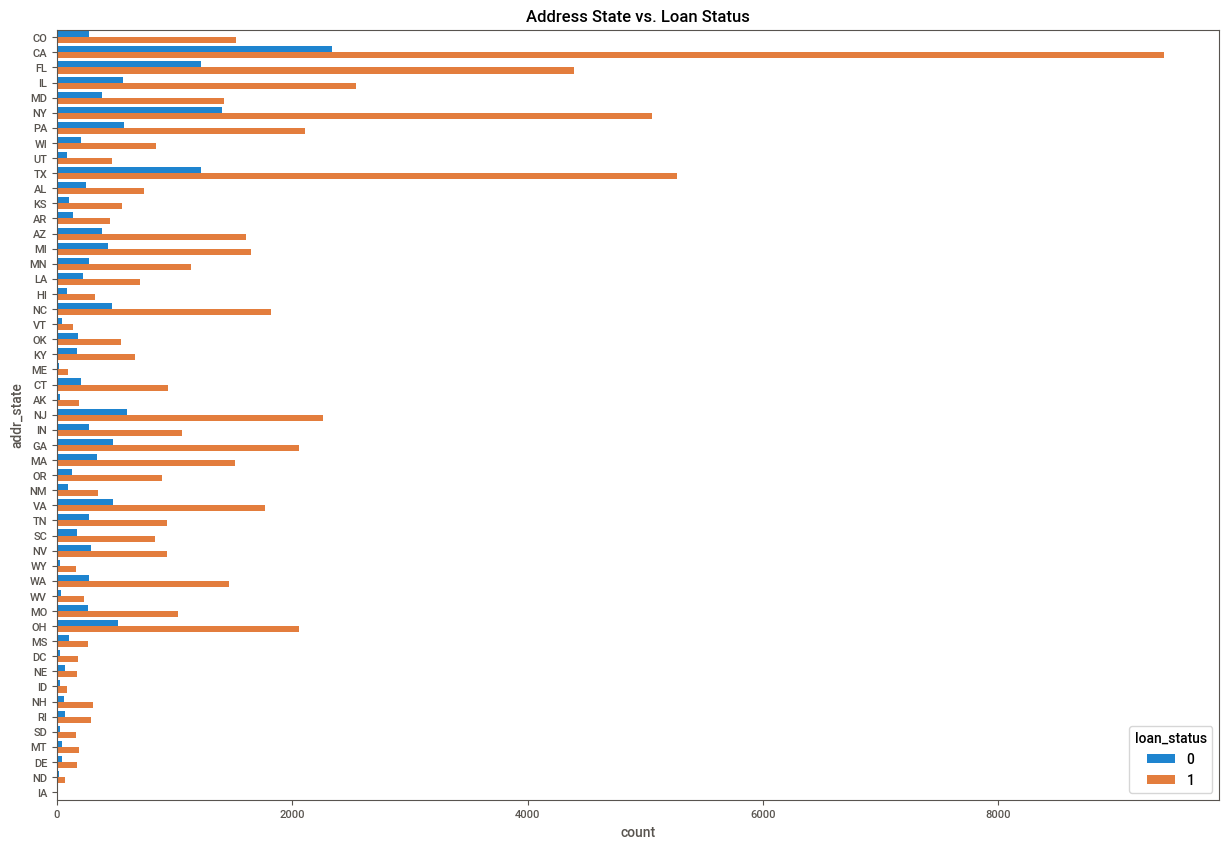

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='addr_state', hue='loan_status', data=df)
plt.title('Address State vs. Loan Status')
plt.show()


## finding the outlire with the help of box\ plot

In [ ]:
# Befor filling the missing values into the data set we firstly check the outlire   Plot boxplots for numerical variables to find the outlire
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


## Preprocessing

Preprocessing involves preparing the data for analysis or modeling. It includes:

### Handling Missing Values
- Filling, imputing, or dropping missing data points.

### Encoding Categorical Variables
- Converting categorical variables into numerical formats that machine learning models can understand.

### Scaling and Normalization
- Adjusting the scale of numerical features to ensure they are on a similar scale.

### Feature Engineering
- Creating new features from existing data to improve model performance.

### Data Cleaning
- Removing or correcting erroneous data points.


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#### converting the target variable into the some numerical values

In [ ]:
for i in df['loan_status'].unique():
  if i == 'Paid':
    df['loan_status'] = df['loan_status'].replace(i,1)
  else:
    df['loan_status'] = df['loan_status'].replace(i,0)

### Treating the missing values by the help of the simple imputor and column transform

In [ ]:
# List of numerical and categorical features to fill
num_features = ['mort_acc', 'pub_rec_bankruptcies', 'revol_util', 'num_actv_bc_tl', 'tot_cur_bal']
cat_features = ['emp_title', 'emp_length', 'title']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_features)
    ])

# Apply the transformations
df[num_features + cat_features] = preprocessor.fit_transform(df)

# Check the result
print(df.isnull().sum())


addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64


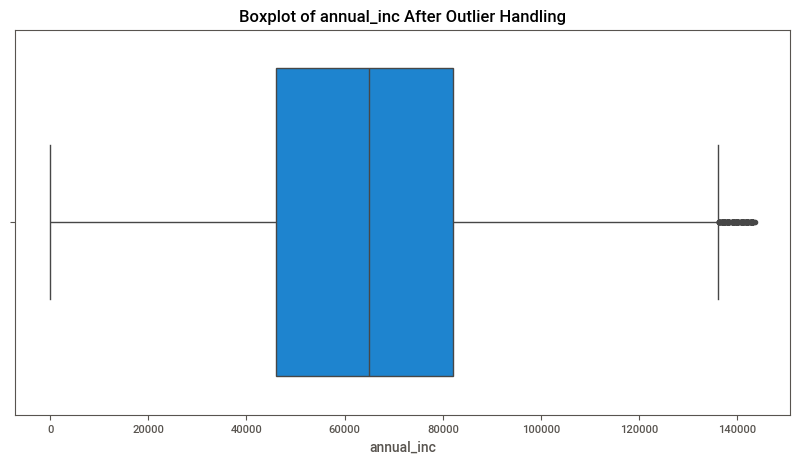

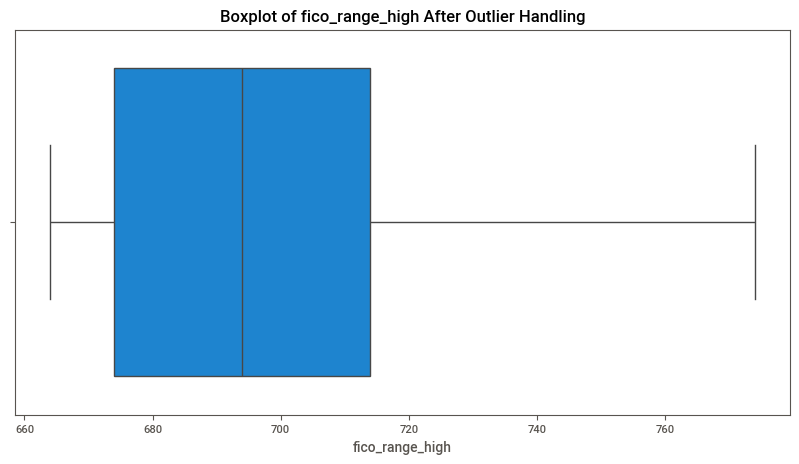

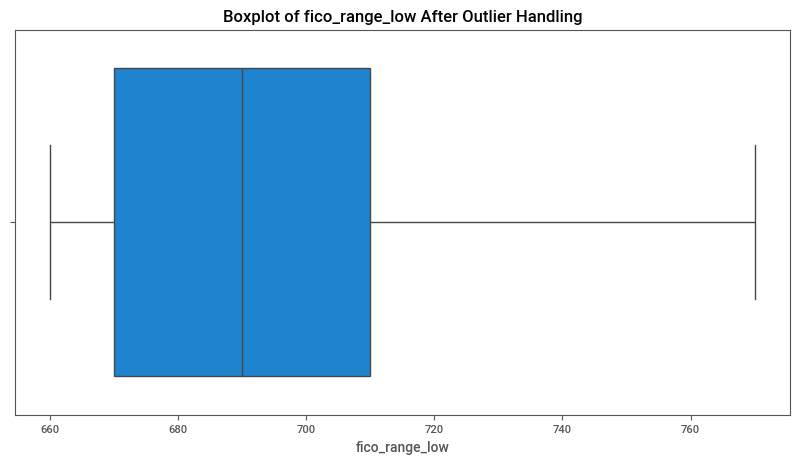

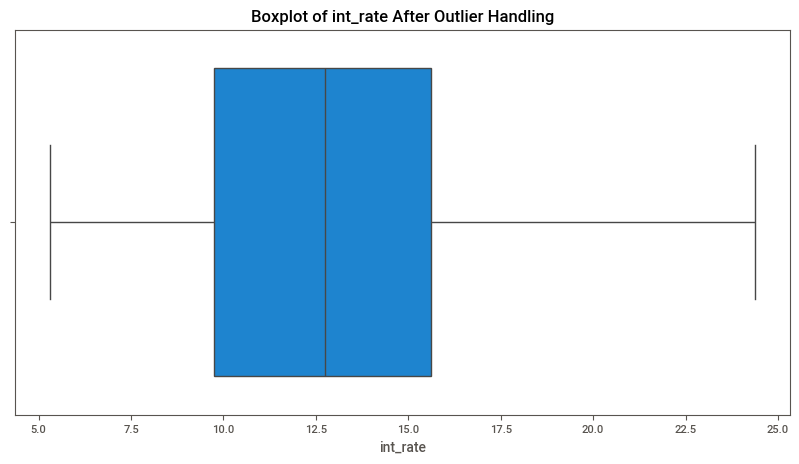

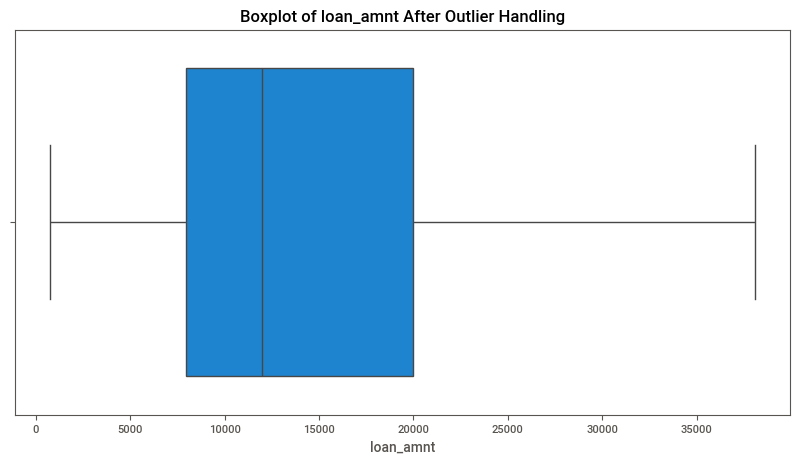

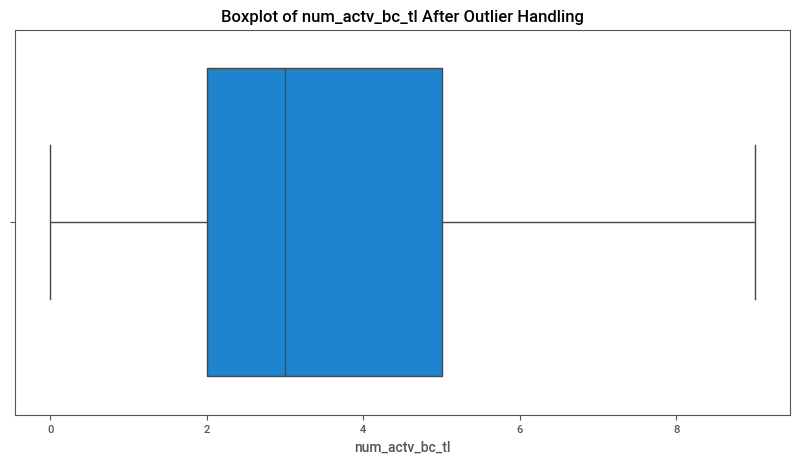

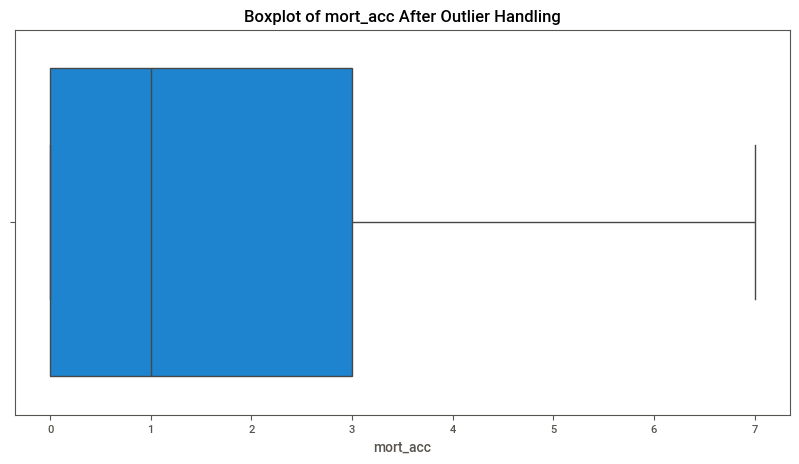

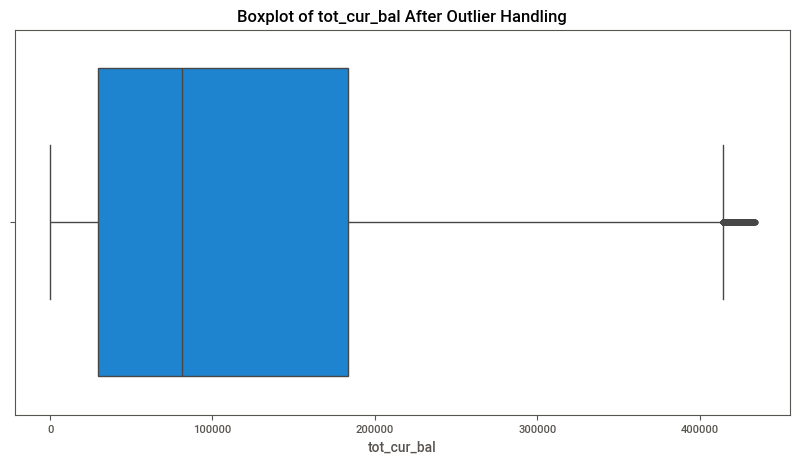

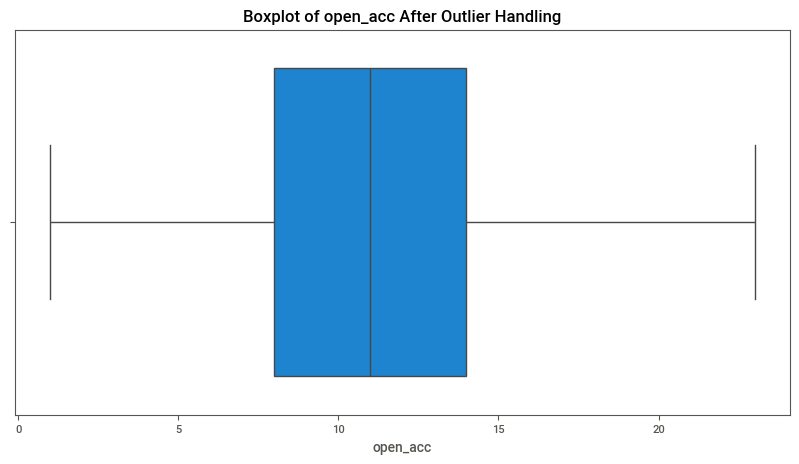

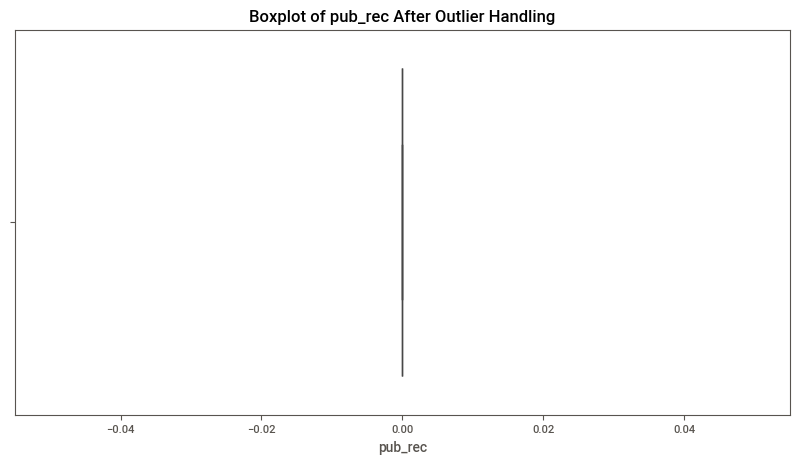

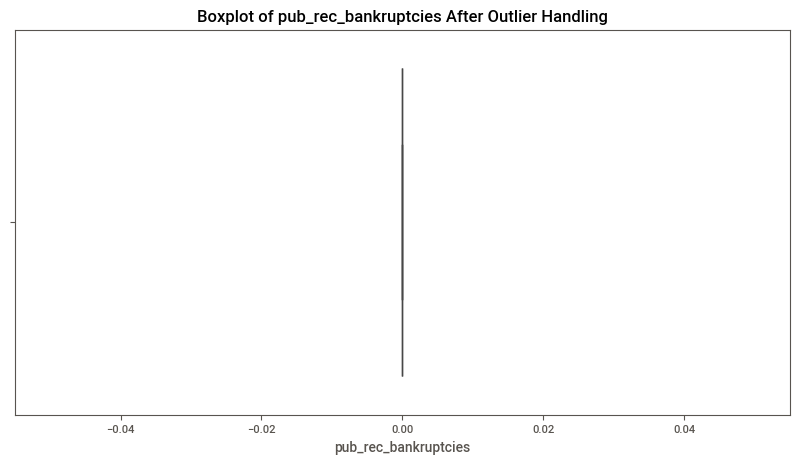

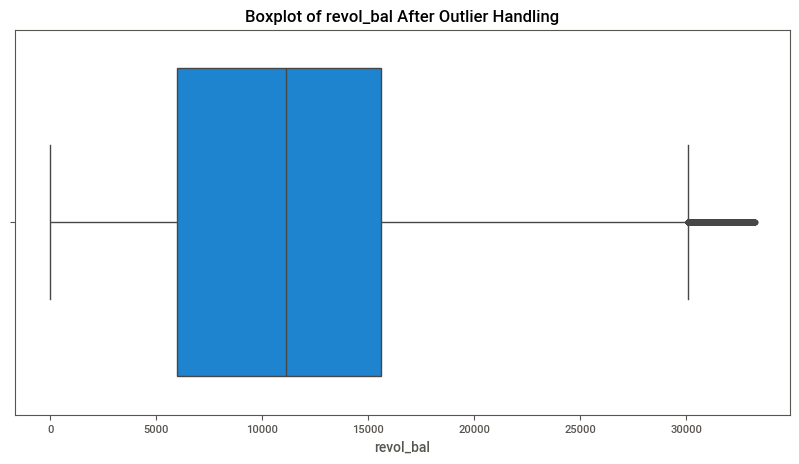

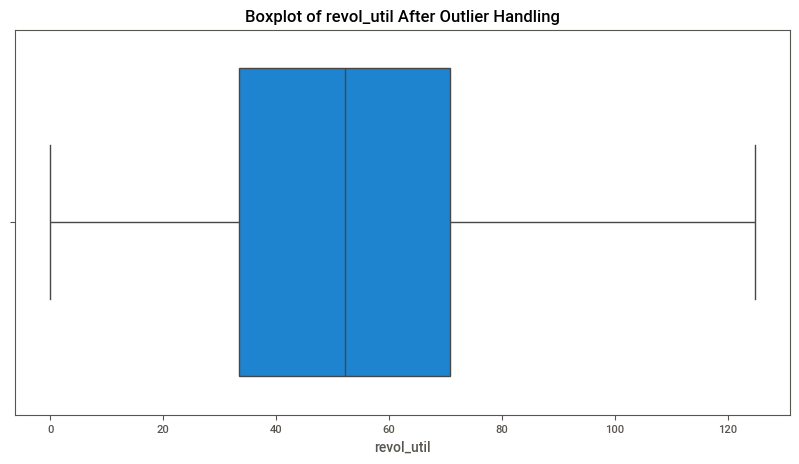

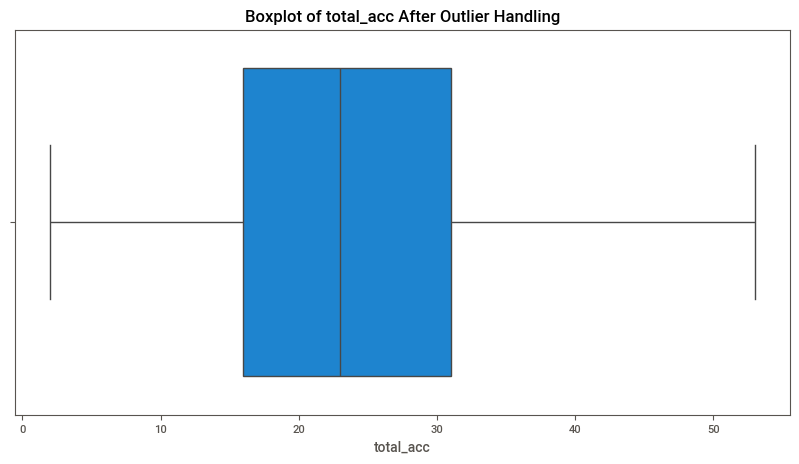

In [ ]:
# Handle outliers in numerical columns using IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])

# Verify outlier treatment
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} After Outlier Handling')
    plt.show()


In [ ]:
# Befor filling the missing values into the data set we firstly check the outlire   Plot boxplots for numerical variables to find the outlire
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


## Data Preprocessing

Preprocessing involves preparing the data for analysis or modeling. It includes:

### Handling Missing Values
- Filling, imputing, or dropping missing data points.

### Encoding Categorical Variables
- Converting categorical variables into numerical formats that machine learning models can understand.

### Scaling and Normalization
- Adjusting the scale of numerical features to ensure they are on a similar scale.

### Feature Engineering
- Creating new features from existing data to improve model performance.

### Data Cleaning
- Removing or correcting erroneous data points.


## Importing sklarn librare and theier some function for performing the data preprocessing

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

## converting the target variable into numerical 

In [ ]:
for i in df['loan_status'].unique():
  if i == 'Paid':
    df['loan_status'] = df['loan_status'].replace(i,1)
  else:
    df['loan_status'] = df['loan_status'].replace(i,0)

## treating the missing values By using the Column transform

In [ ]:
# List of numerical and categorical features to fill
num_features = ['mort_acc', 'pub_rec_bankruptcies', 'revol_util', 'num_actv_bc_tl', 'tot_cur_bal']
cat_features = ['emp_title', 'emp_length', 'title']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', SimpleImputer(strategy='most_frequent'), cat_features)
    ])

# Apply the transformations
df[num_features + cat_features] = preprocessor.fit_transform(df)

# Check the result
print(df.isnull().sum())


# handling the outliers

In [ ]:
# Handle outliers in numerical columns using IQR method
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                          df[column].median(), df[column])

# Verify outlier treatment
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} After Outlier Handling')
    plt.show()
